In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import locale

import pandas as pd

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = '16'
mpl.rcParams['axes.formatter.use_locale'] = True

locale.setlocale(locale.LC_NUMERIC, "de_DE")

'de_DE'

In [2]:
def plot_validation(result_in_situ, result_image, title, plot_save_path, are_big_markers=False, show_r2=True):
   r2 = r2_score(result_in_situ, result_image)

   df_in_situ = result_in_situ.to_frame()
   df_image = result_image.to_frame()
   regressor = LinearRegression().fit(df_in_situ, df_image)
   
   f, ax = plt.subplots()

   if (are_big_markers):
      s=250
   else:
      s=10

   plt.scatter(
      df_in_situ, 
      df_image,
      s=s,
      color='#6495ED',
      marker="."
      )

   plt.plot(
      df_in_situ,
      regressor.predict(df_in_situ),
      linewidth=1.5,
      color='black'
   )

   plt.ylim((-1,23.2))
   # ax.set_yticks([-0.3499999999999659,0,5,10,15,20, 22.71000000000004],["","0","5","10","15","20", ""])
   
   plt.xlabel(r"ТПС_${in\ situ}, {\degree}C$")
   plt.ylabel(title)
   # plt.legend(loc="upper left")

   intercept = regressor.intercept_[0]
   if (intercept < 0):
      sign = "-"
   else:
      sign = "+"

   if(show_r2):
      plt.text(
         x=0.2,
         y=0.92,
         s=f"y = {locale.format_string('%.2f', regressor.coef_[0][0])}x {sign} {locale.format_string('%.2f', abs(intercept))}\n$R^2$ = {locale.format_string('%.2f',r2)}",
         horizontalalignment='center',
         verticalalignment='top',
         transform = ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.2))
   else:
      plt.text(
         x=0.2,
         y=0.9,
         s=f"y = {locale.format_string('%.2f', regressor.coef_[0][0])}x {sign} {locale.format_string('%.2f', abs(intercept))}",
         horizontalalignment='center',
         verticalalignment='top',
         transform = ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.2))

   plt.savefig(plot_save_path)

In [ ]:
def plot_validation_multiple(results_in_situ, results_image, colors, names, ylable, plot_save_path, legeng_font_size=None):

   f, ax = plt.subplots()

   for (i, (result_in_situ, result_image, name)) in enumerate(zip(results_in_situ, results_image, names)):
      df_in_situ = result_in_situ.to_frame()
      df_image = result_image.to_frame()
      regressor = LinearRegression().fit(df_in_situ, df_image)

      plt.scatter(
         df_in_situ, 
         df_image,
         s=250,
         color=colors(i, alpha=0.4),
         marker=".",
         # label=f"Температура {name}"
         )

      r2 = r2_score(result_in_situ, result_image)
      intercept = regressor.intercept_[0]
      if (intercept < 0):
         sign = "-"
      else:
         sign = "+"
         
      plt.plot(
         df_in_situ,
         regressor.predict(df_in_situ),
         linewidth=1.5,
         color=colors(i),
         # label=f"Линейная регрессия {name}"
         label=f"{name}:\n" + f"y = {locale.format_string('%.2f', regressor.coef_[0][0])}x {sign} {locale.format_string('%.2f', abs(intercept))}\n$R^2$ = {locale.format_string('%.2f',r2)}",
      )

   plt.ylim((-1,35.2))
   # ax.set_yticks([-0.3499999999999659,0,5,10,15,20, 22.71000000000004],["","0","5","10","15","20", ""])
   
   plt.plot(
      np.linspace(results_in_situ[0].min(), results_in_situ[0].max(), 100),
      np.linspace(results_in_situ[0].min(), results_in_situ[0].max(), 100),
      linewidth=1.5,
      # linewidth=1,
      color="black",
      label=r"$y\ =\ x$",
      linestyle='dashed',
      dashes=(8, 5)
   )
      
   plt.xlabel(r"ТПС_${in\ situ}, {\degree}C$")
   plt.ylabel(ylable)

   if(legeng_font_size is None):
      plt.legend(loc="upper left")
   else:
      plt.legend(loc="upper left", fontsize=legeng_font_size)

   plt.savefig(plot_save_path)

In [4]:
one_color = plt.get_cmap('rainbow', 1)
two_colors = plt.get_cmap('rainbow', 2)
three_colors = plt.get_cmap('jet', 3)

## Считать сохранённые данные для валидации 

In [5]:
landsat_df = pd.read_csv('Данные_валидации/ready/landsat_validation1_filtered.csv')
landsat_in_situ = landsat_df['T']
landsat_image = landsat_df['Image T']

landsat_with7_df = pd.read_csv('Данные_валидации/ready/landsat_with7_validation1_filtered.csv')
landsat_with7_in_situ = landsat_with7_df['T']
landsat_with7_image = landsat_with7_df['Image T']

l2sp_df = pd.read_csv('Данные_валидации/ready/ls2p_validation1_filtered.csv')
l2sp_df = l2sp_df[l2sp_df['Landsat'] != 'Landsat 7 Tier 1']
l2sp_in_situ = l2sp_df['T']
l2sp_image = l2sp_df['Image T']

mod11_day_df = pd.read_csv('Данные_валидации/ready/mod11_day_filtered.csv')
mod11_day_in_situ = mod11_day_df['T']
mod11_day_image = mod11_day_df['Image T']

mod11_night_df = pd.read_csv('Данные_валидации/ready/mod11_night_filtered.csv')
mod11_night_in_situ = mod11_night_df['T']
mod11_night_image = mod11_night_df['Image T']

mod21_day_df = pd.read_csv('Данные_валидации/ready/mod21_day_filtered.csv')
mod21_day_in_situ = mod21_day_df['T']
mod21_day_image = mod21_day_df['Image T']

mod21_night_df = pd.read_csv('Данные_валидации/ready/mod21_night_filtered.csv')
mod21_night_in_situ = mod21_night_df['T']
mod21_night_image = mod21_night_df['Image T']

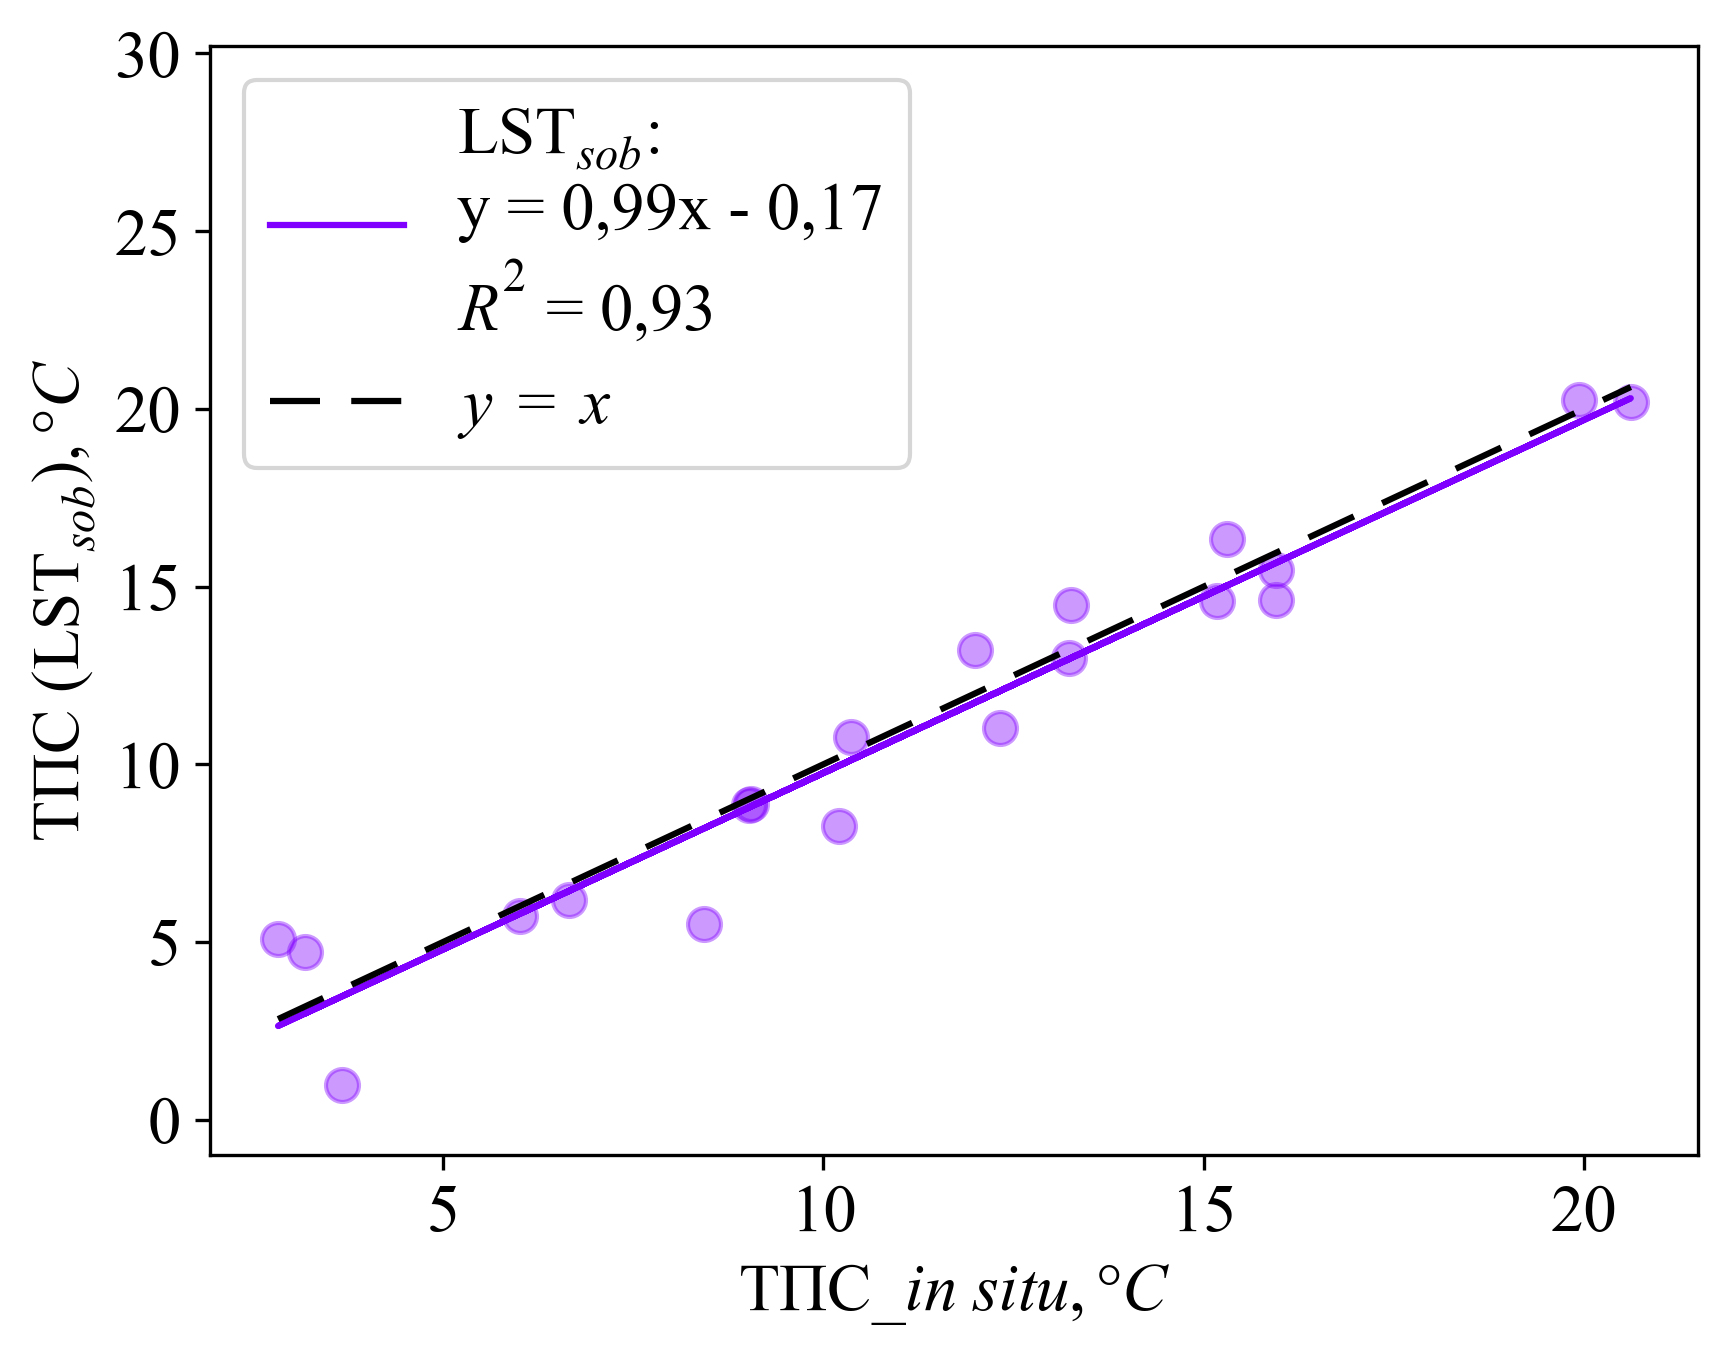

In [30]:
plot_validation_multiple([landsat_in_situ], [landsat_image], one_color, [r"LST$_{sob}$"], r"ТПС (LST$_{sob}), {\degree}C$", "Линейная_регрессия/LSTsob_8-9_color.png")

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


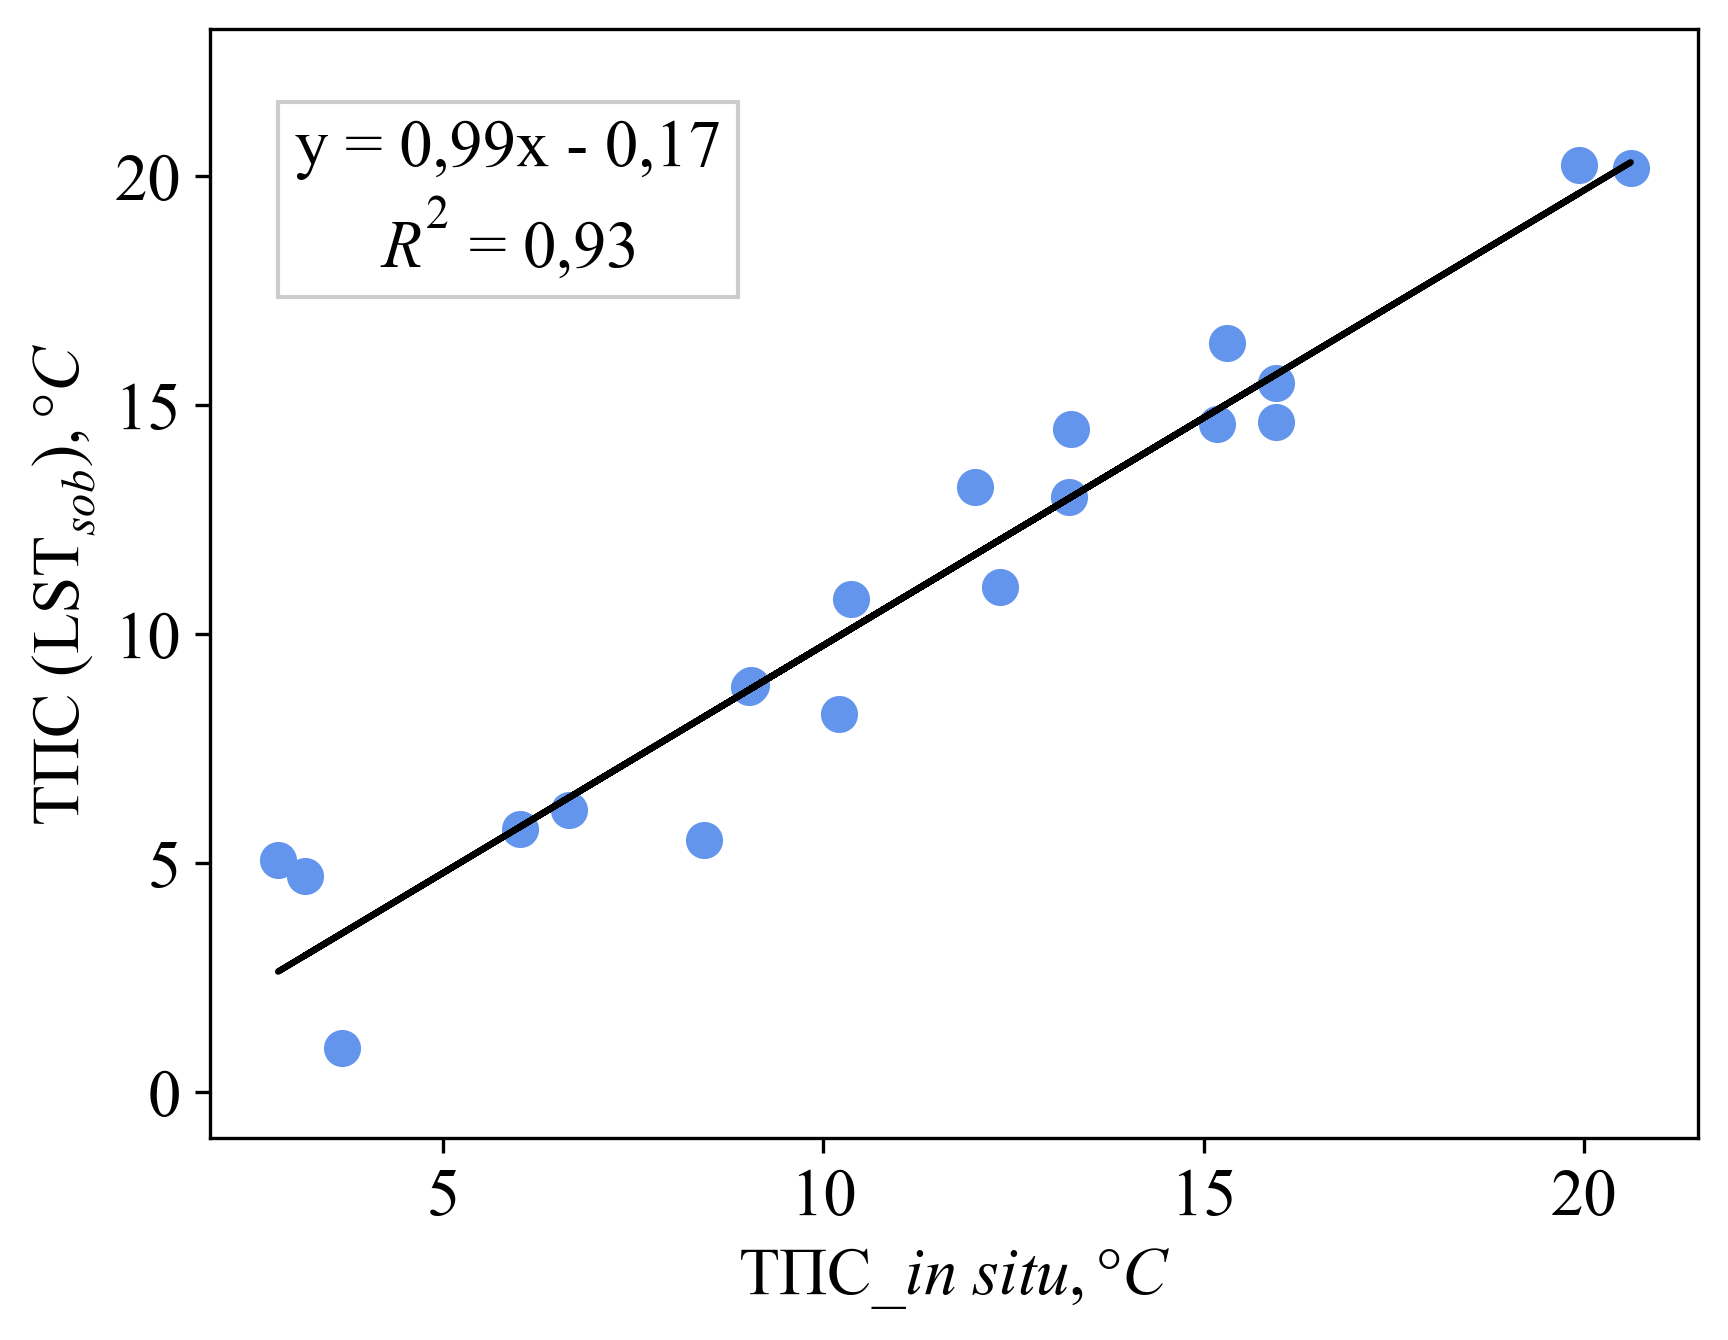

In [6]:
plot_validation(landsat_in_situ, landsat_image, r"ТПС (LST$_{sob}), {\degree}C$", "Линейная_регрессия/LSTsob_8-9.png", are_big_markers=True)

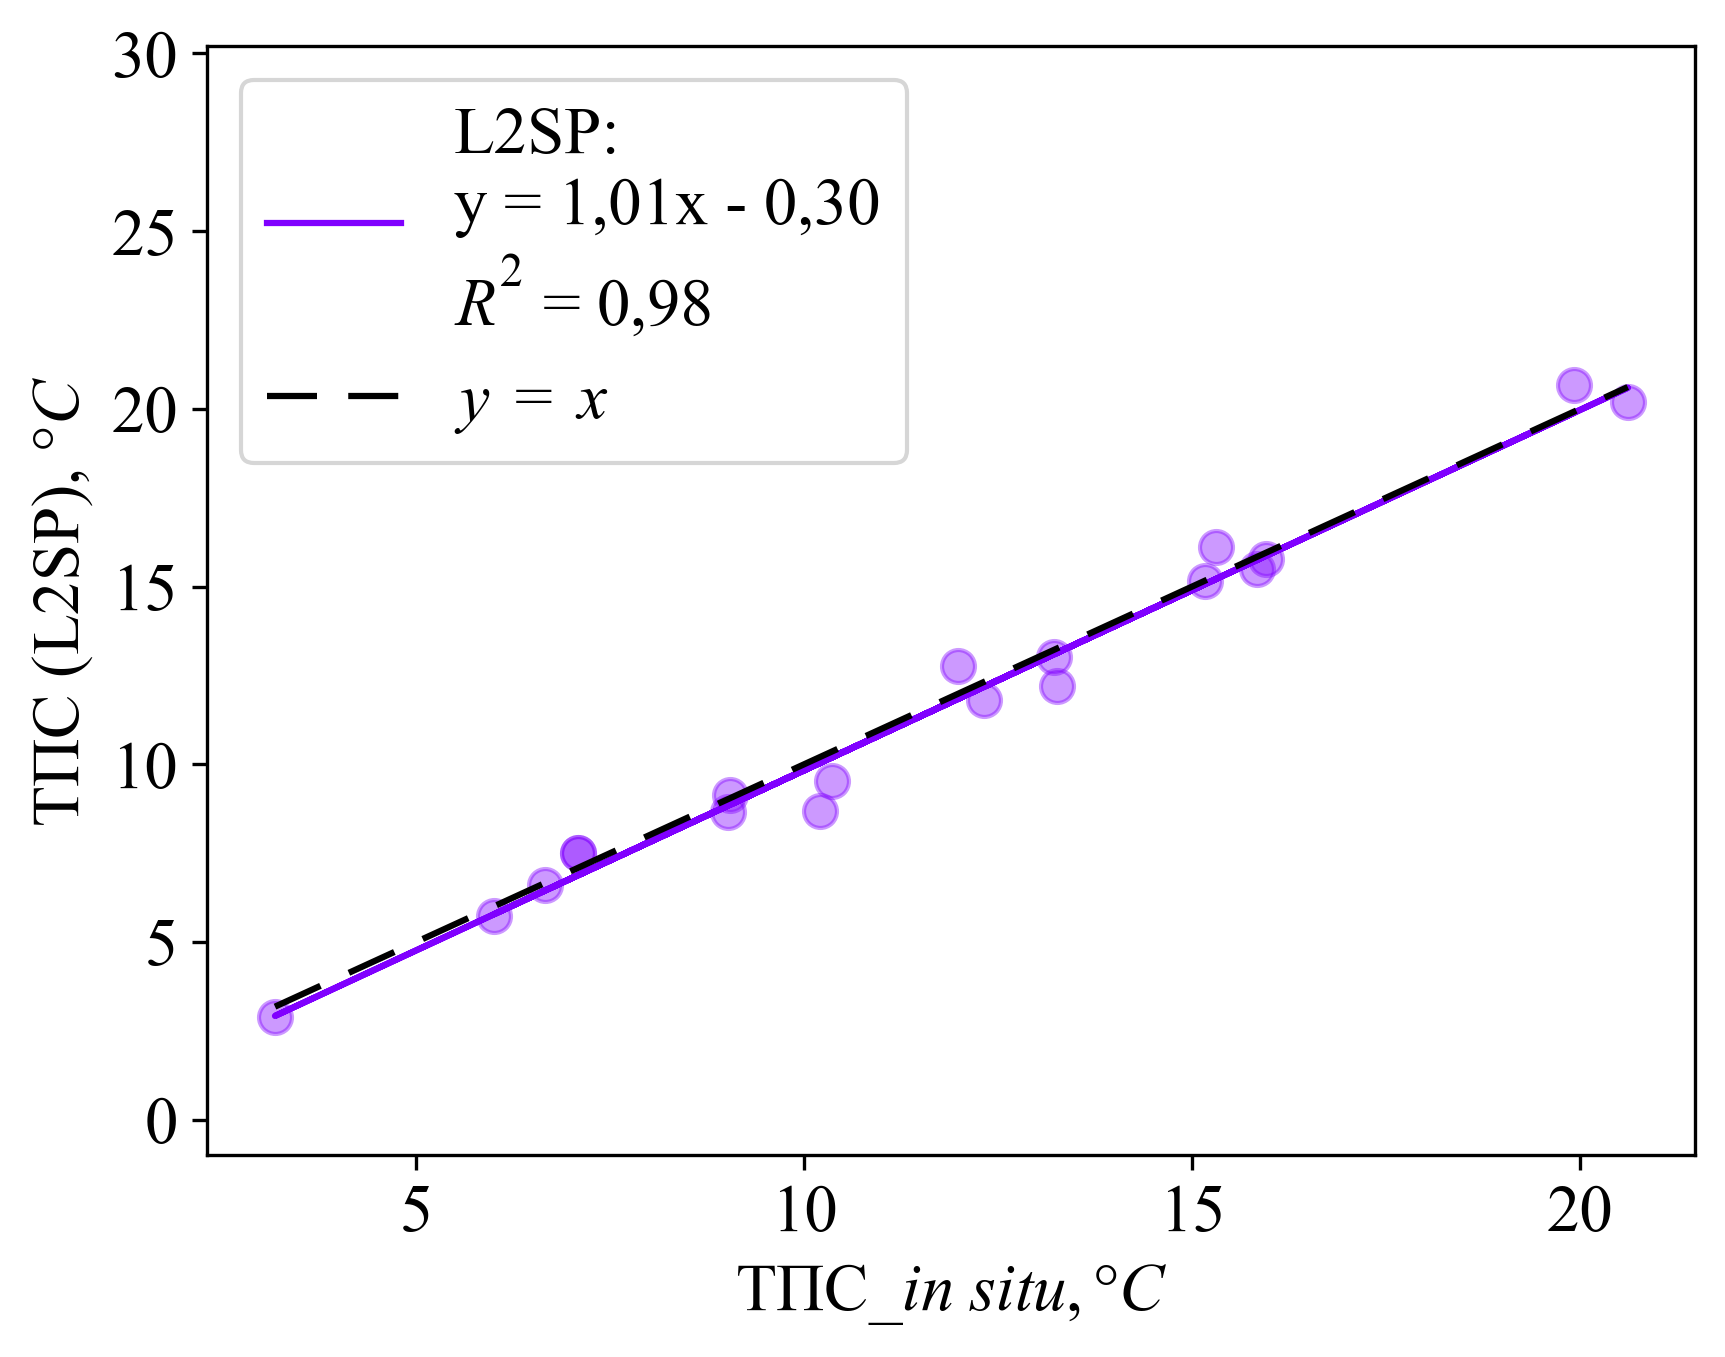

In [31]:
plot_validation_multiple([l2sp_in_situ], [l2sp_image], one_color, ["L2SP"], r"ТПС (L2SP), ${\degree}C$", "Линейная_регрессия/L2SP_8-9_color.png")

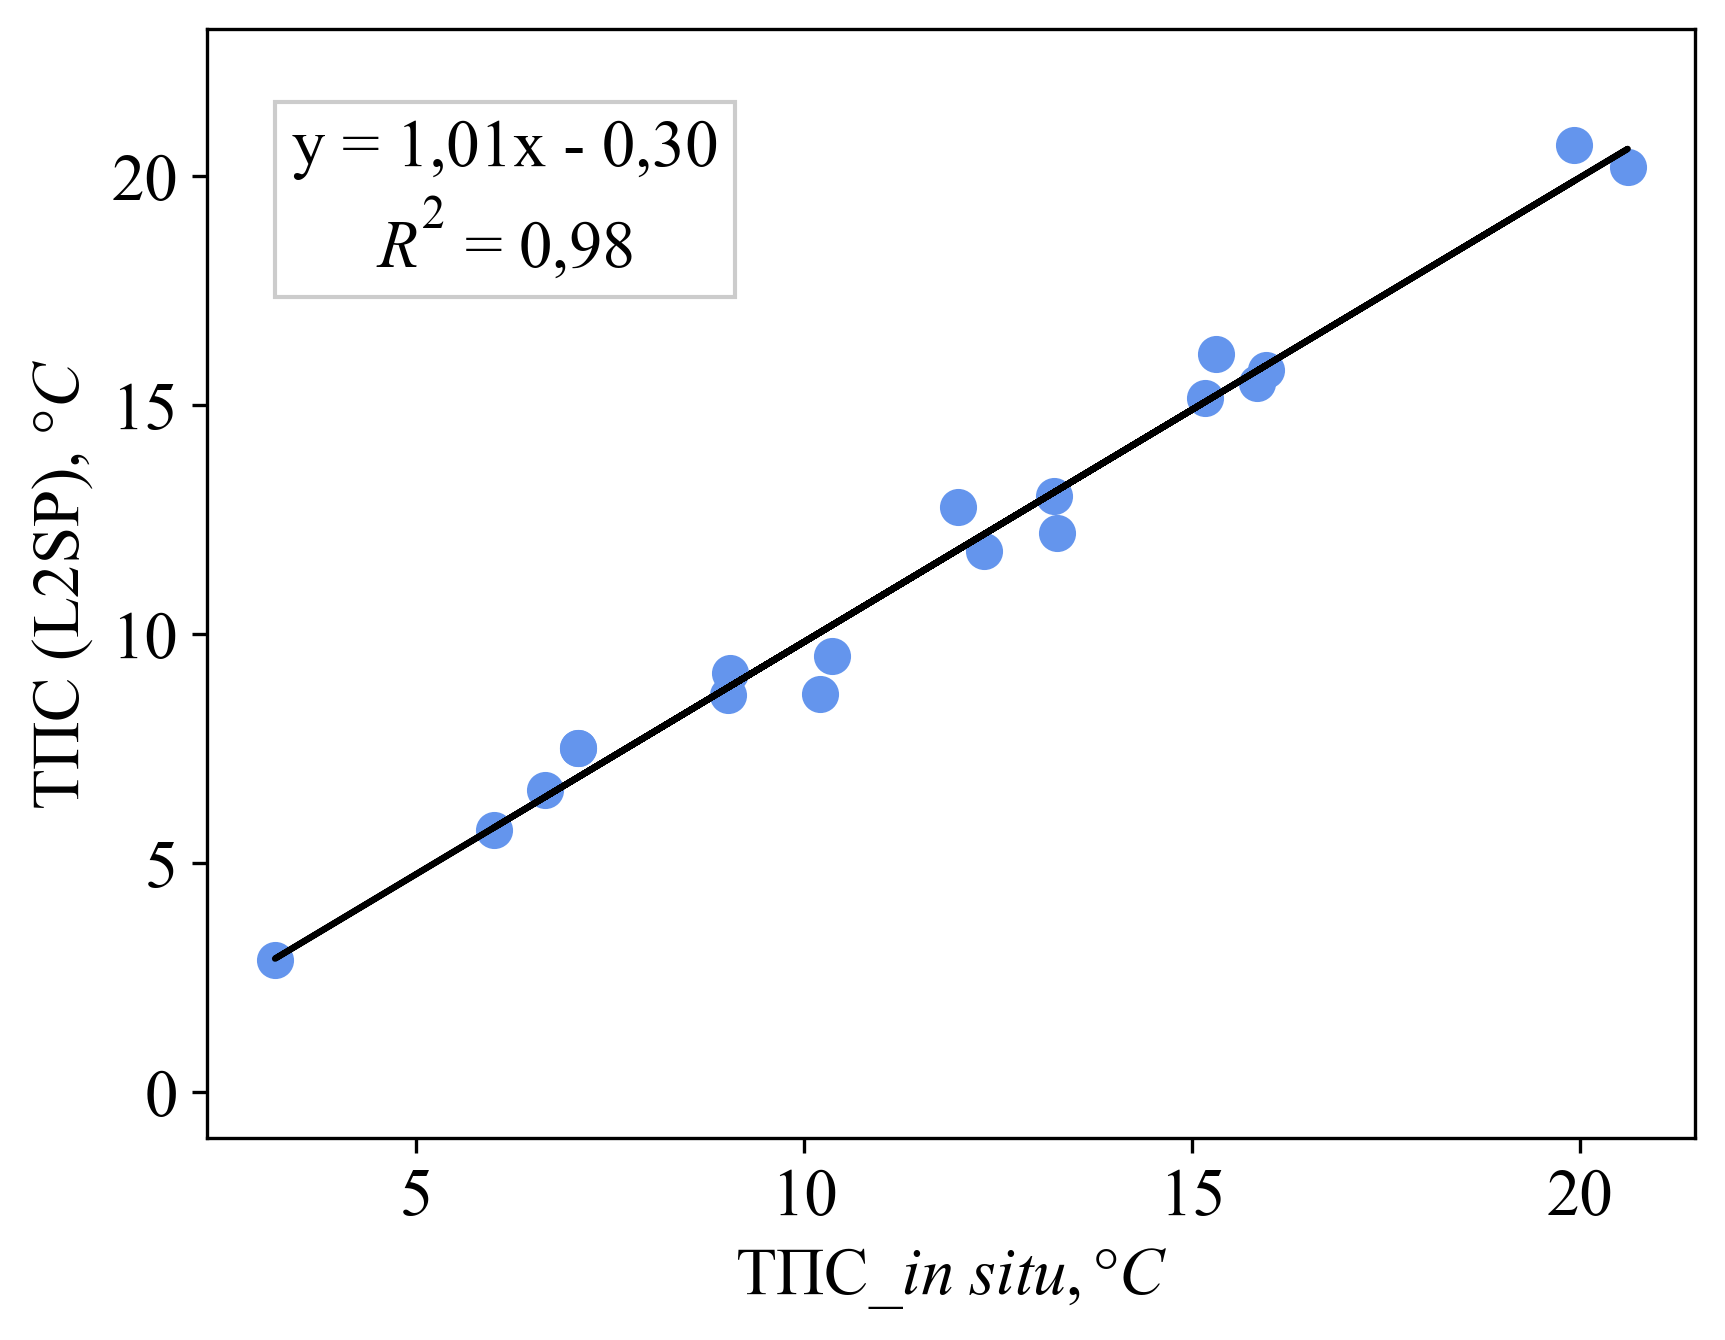

In [32]:
plot_validation(l2sp_in_situ, l2sp_image, r"ТПС (L2SP), ${\degree}C$", "Линейная_регрессия/L2SP_8-9.png", are_big_markers=True)

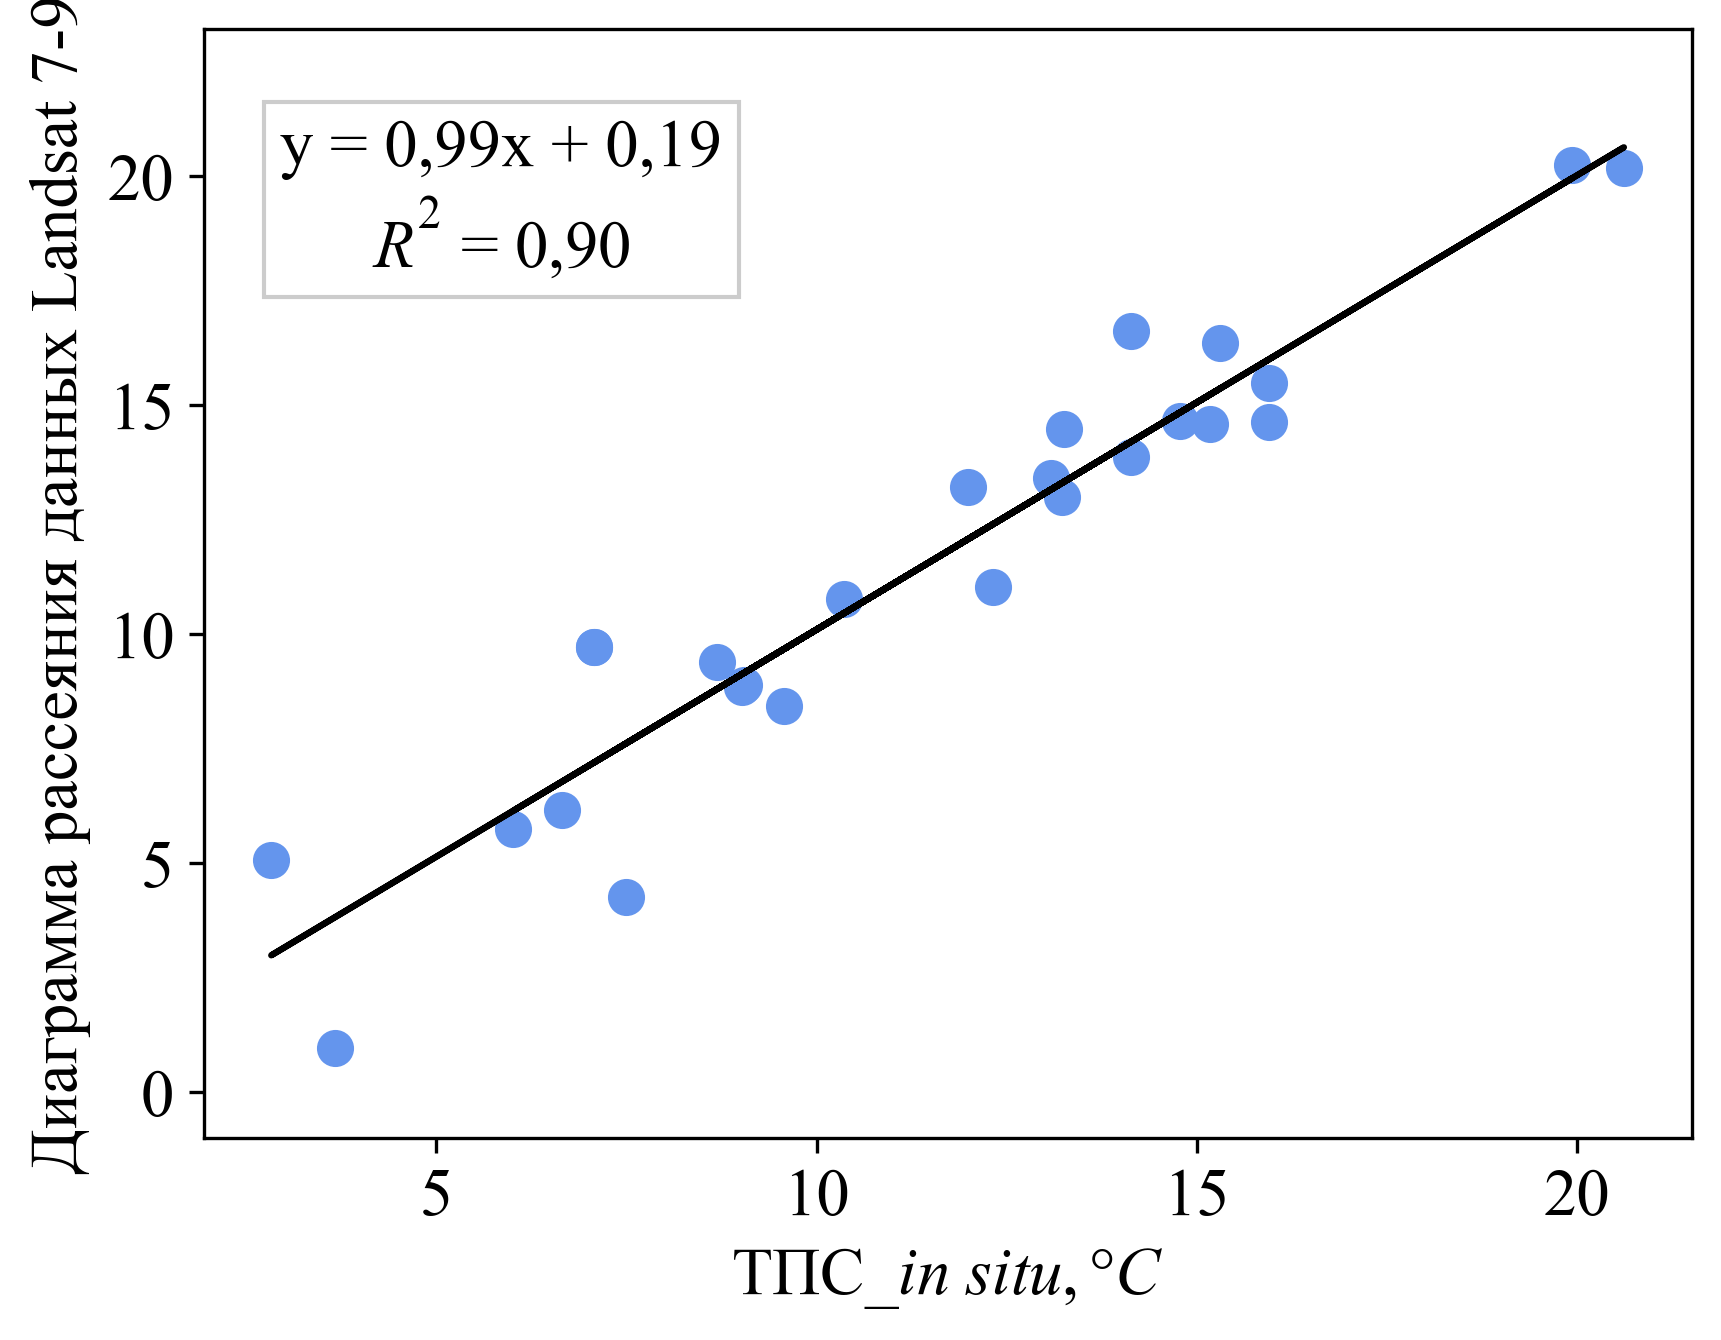

In [33]:
plot_validation(landsat_with7_in_situ, landsat_with7_image, "Диаграмма рассеяния данных Landsat 7-9", "Линейная_регрессия/landsat_7-9.png", are_big_markers=True)

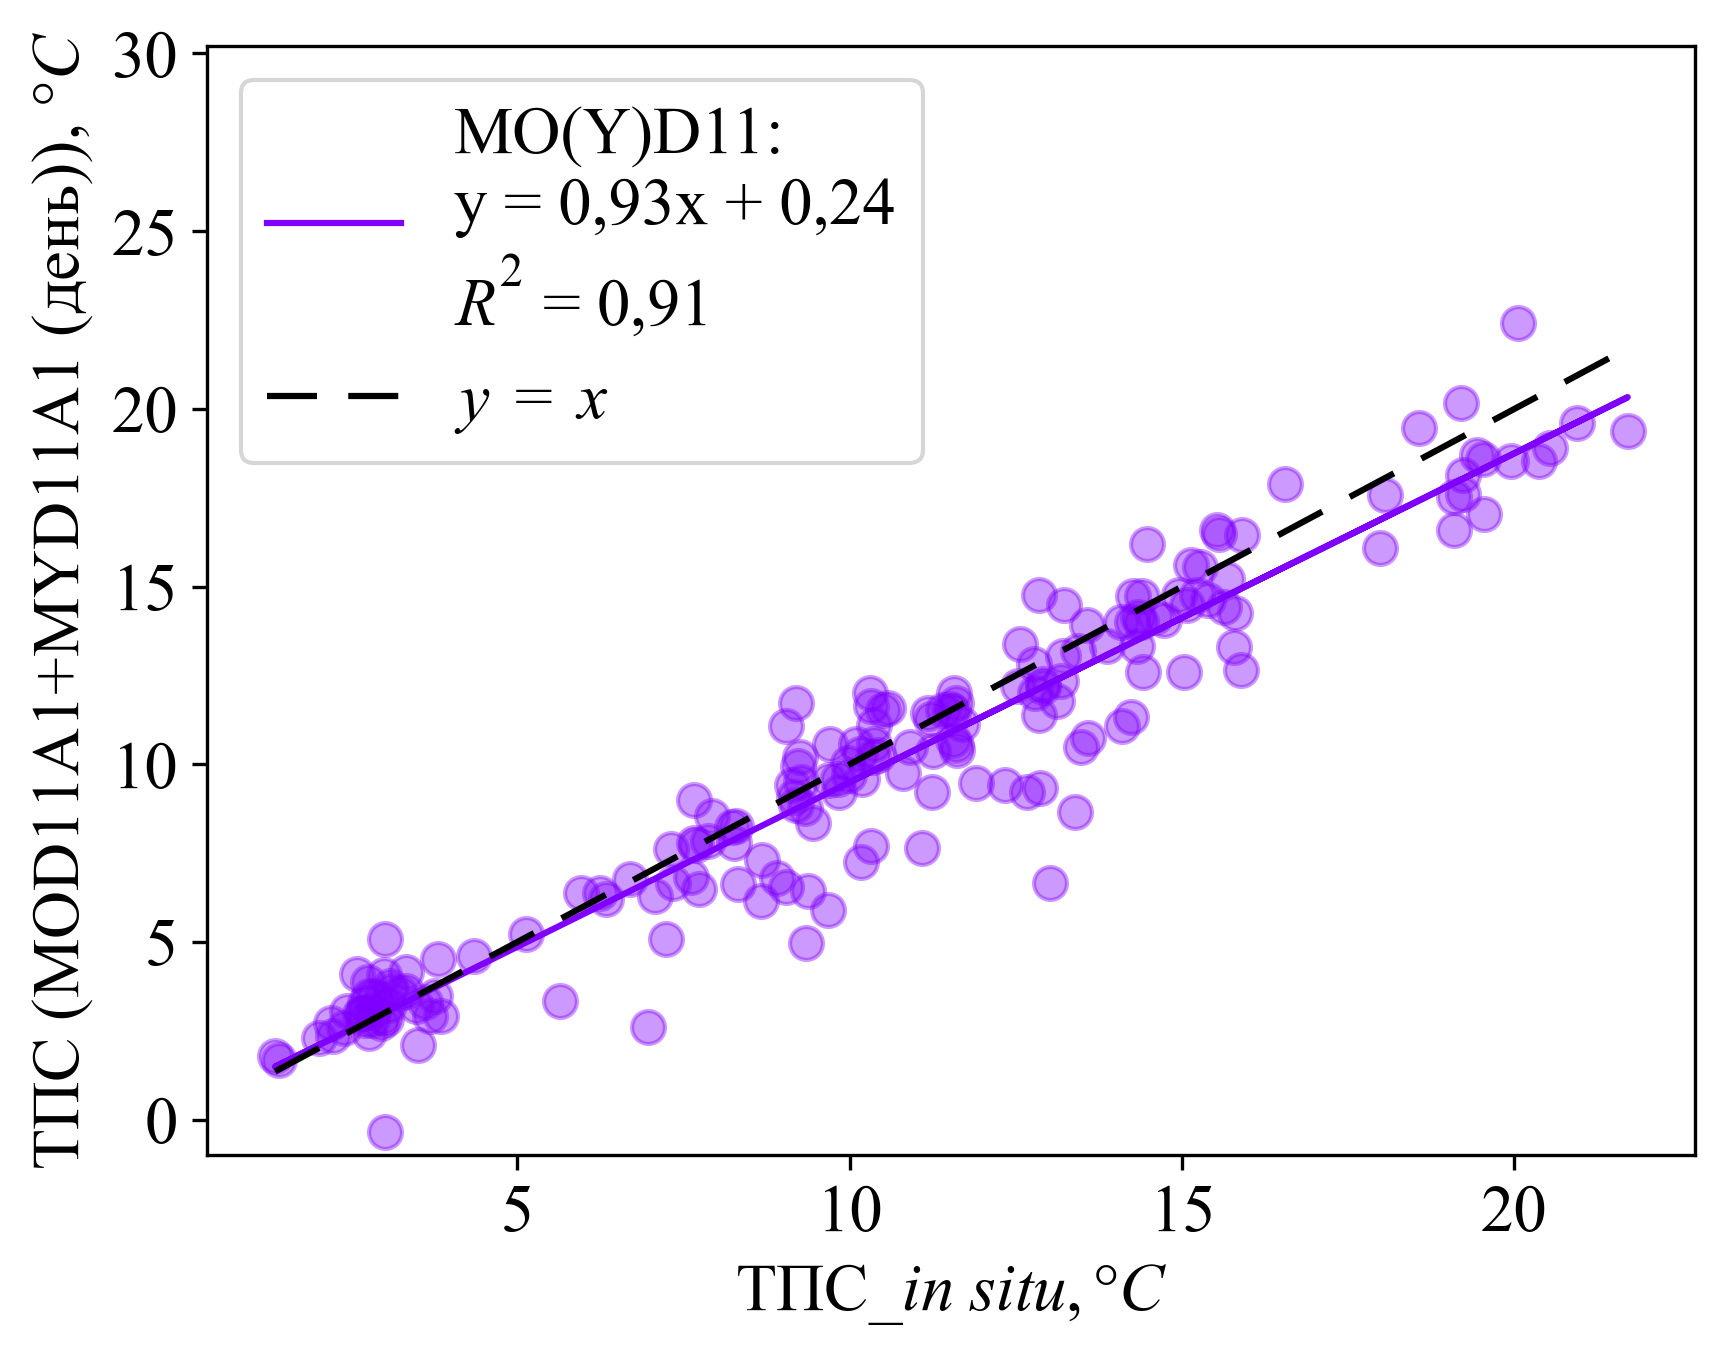

In [34]:
plot_validation_multiple([mod11_day_in_situ], [mod11_day_image], one_color, ["MO(Y)D11"], r"ТПС (MOD11A1+MYD11A1 (день)), ${\degree}C$", "Линейная_регрессия/mod11_day_color.png")

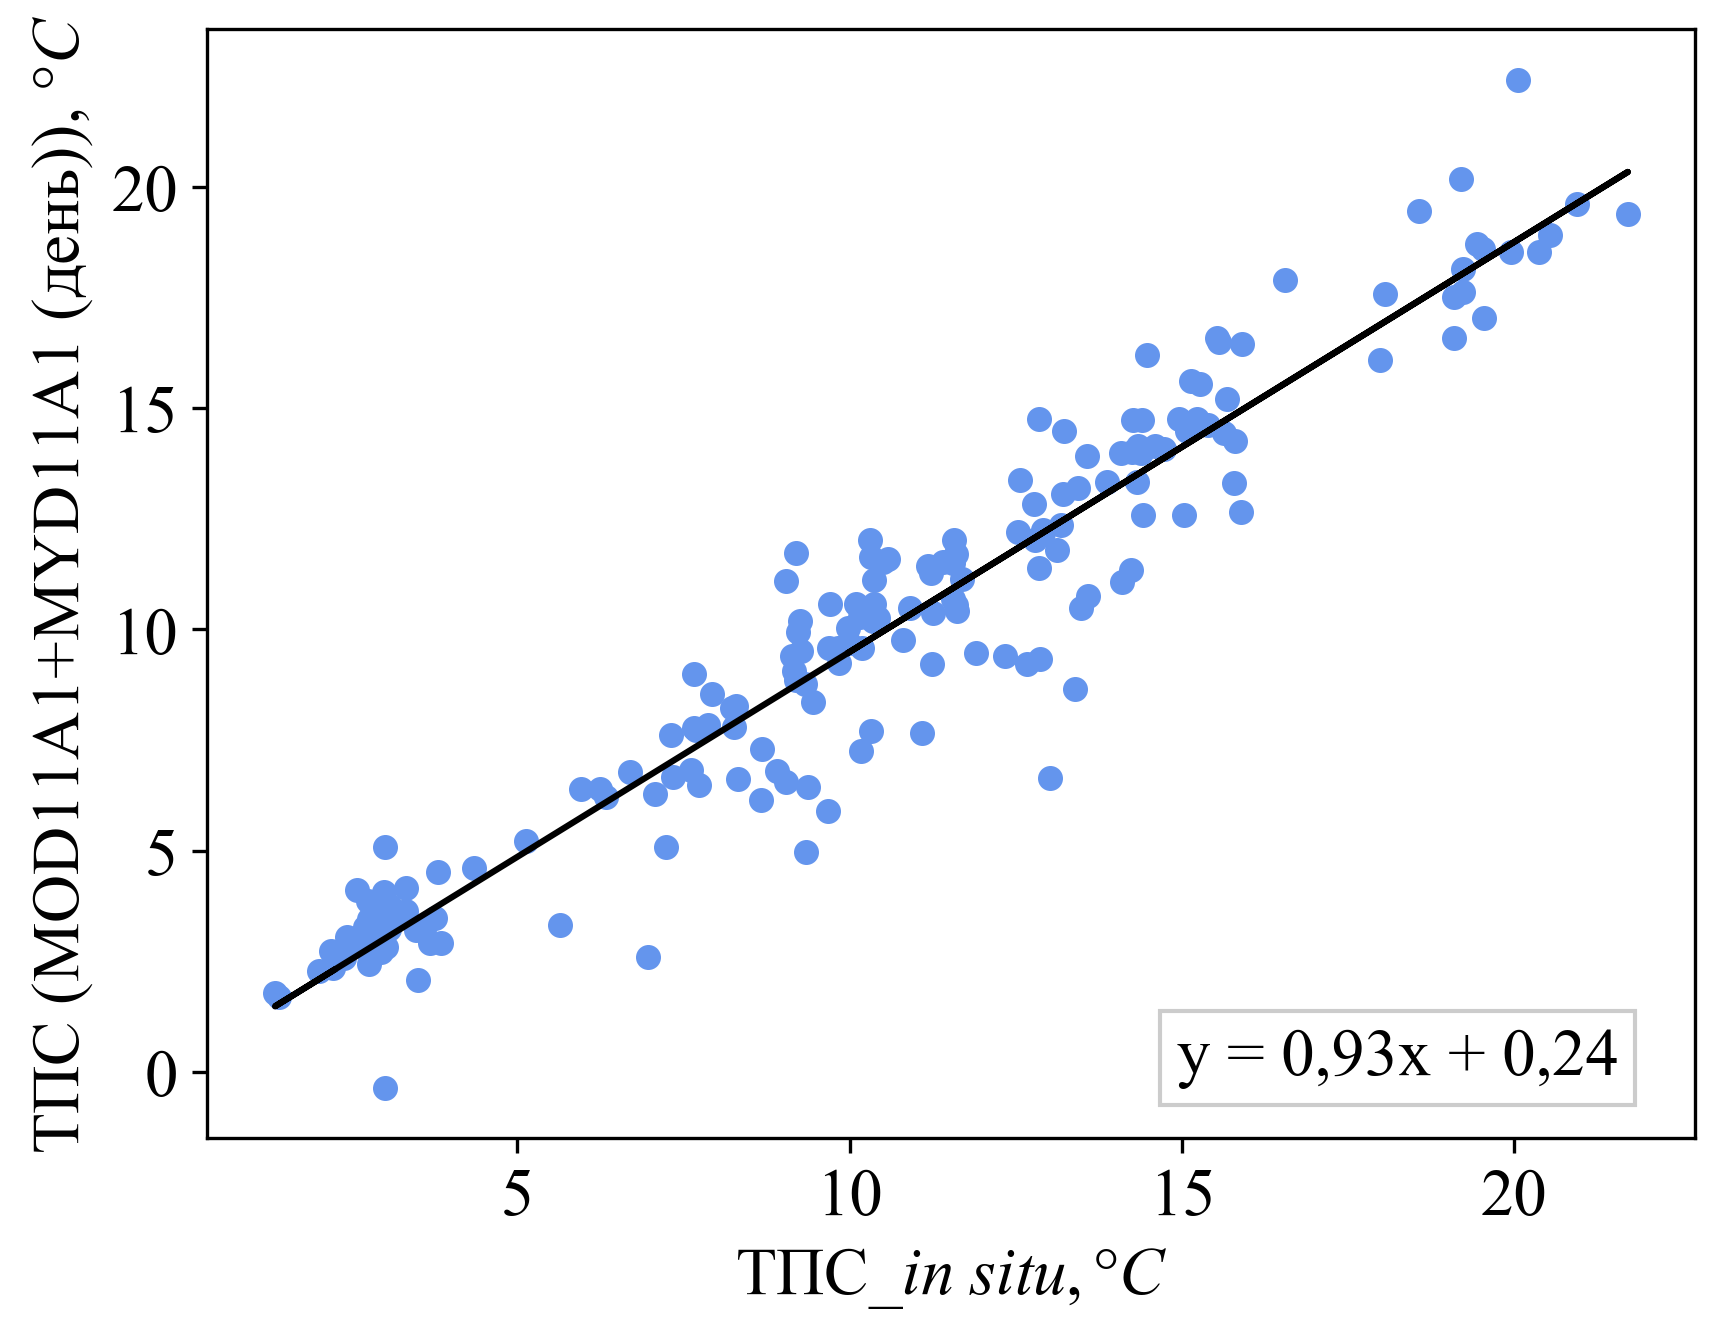

In [8]:
plot_validation(mod11_day_in_situ, mod11_day_image, r"ТПС (MOD11A1+MYD11A1 (день)), ${\degree}C$", "Линейная_регрессия/mod11_day_nor2.png", are_big_markers=True, show_r2=False)

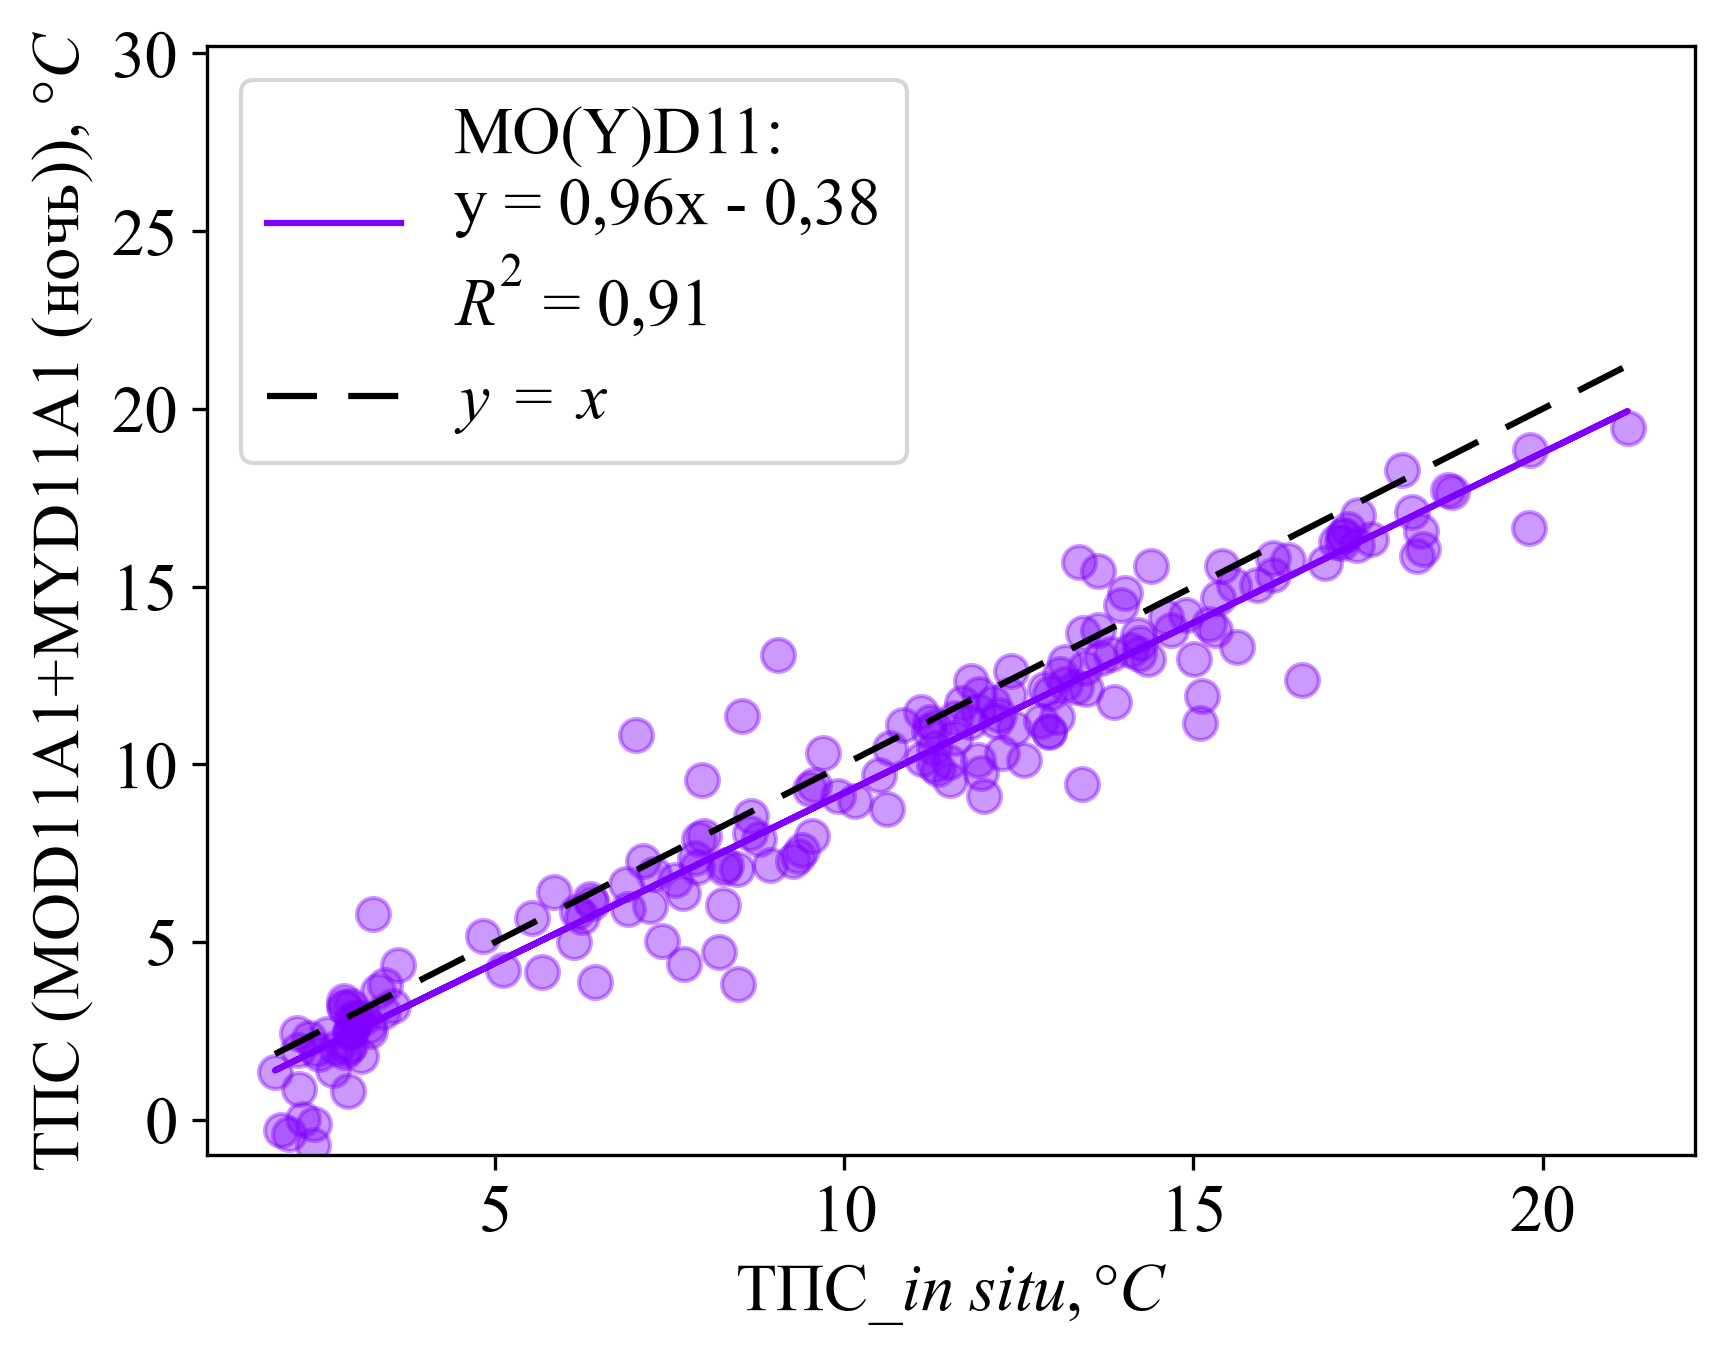

In [35]:
plot_validation_multiple([mod11_night_in_situ], [mod11_night_image], one_color, ["MO(Y)D11"], r"ТПС (MOD11A1+MYD11A1 (ночь)), ${\degree}C$", "Линейная_регрессия/mod11_night_color.png")

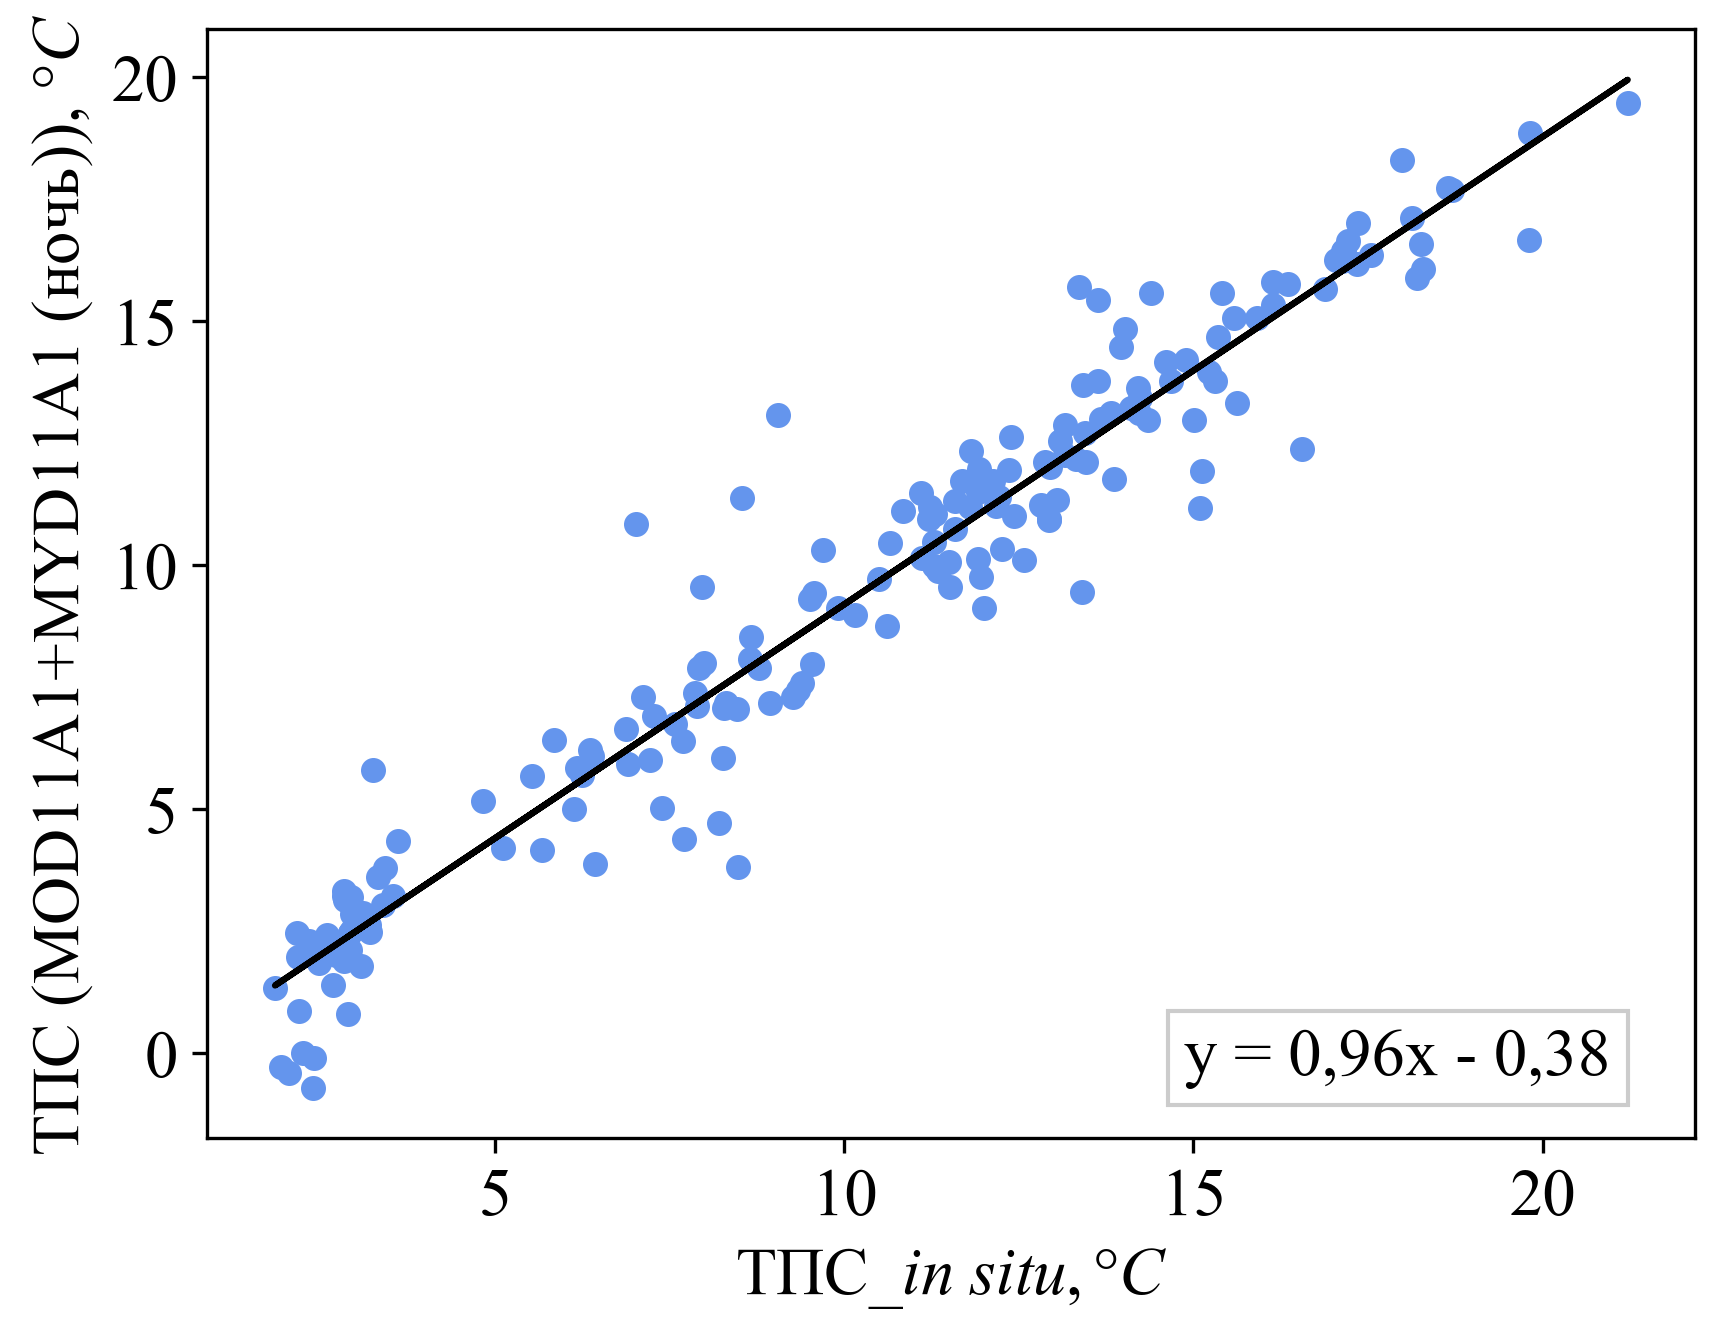

In [9]:
plot_validation(mod11_night_in_situ, mod11_night_image, r"ТПС (MOD11A1+MYD11A1 (ночь)), ${\degree}C$", "Линейная_регрессия/mod11_night_nor2.png", are_big_markers=True, show_r2=False)

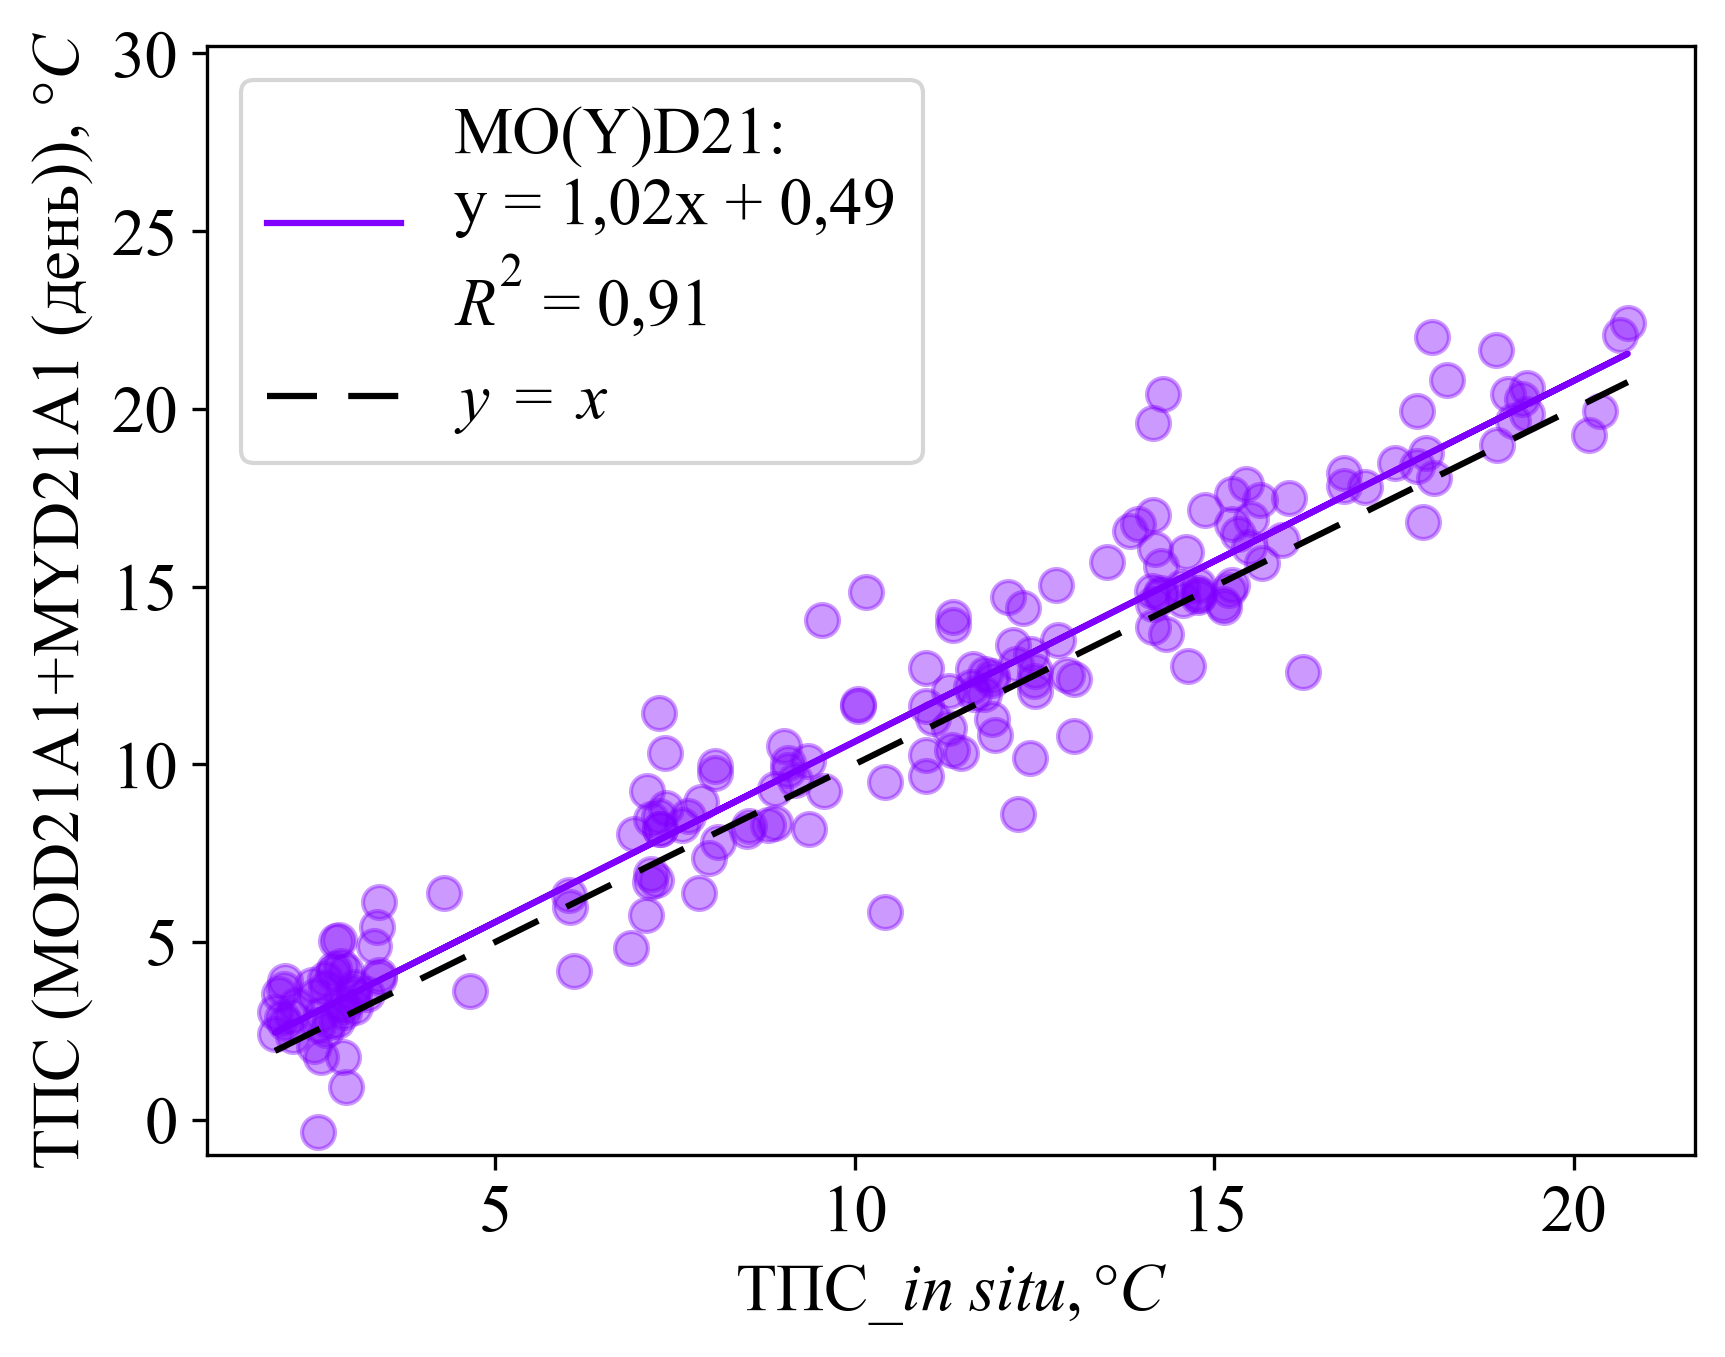

In [36]:
plot_validation_multiple([mod21_day_in_situ], [mod21_day_image], one_color, ["MO(Y)D21"], r"ТПС (MOD21A1+MYD21A1 (день)), ${\degree}C$", "Линейная_регрессия/mod21_day_color.png")

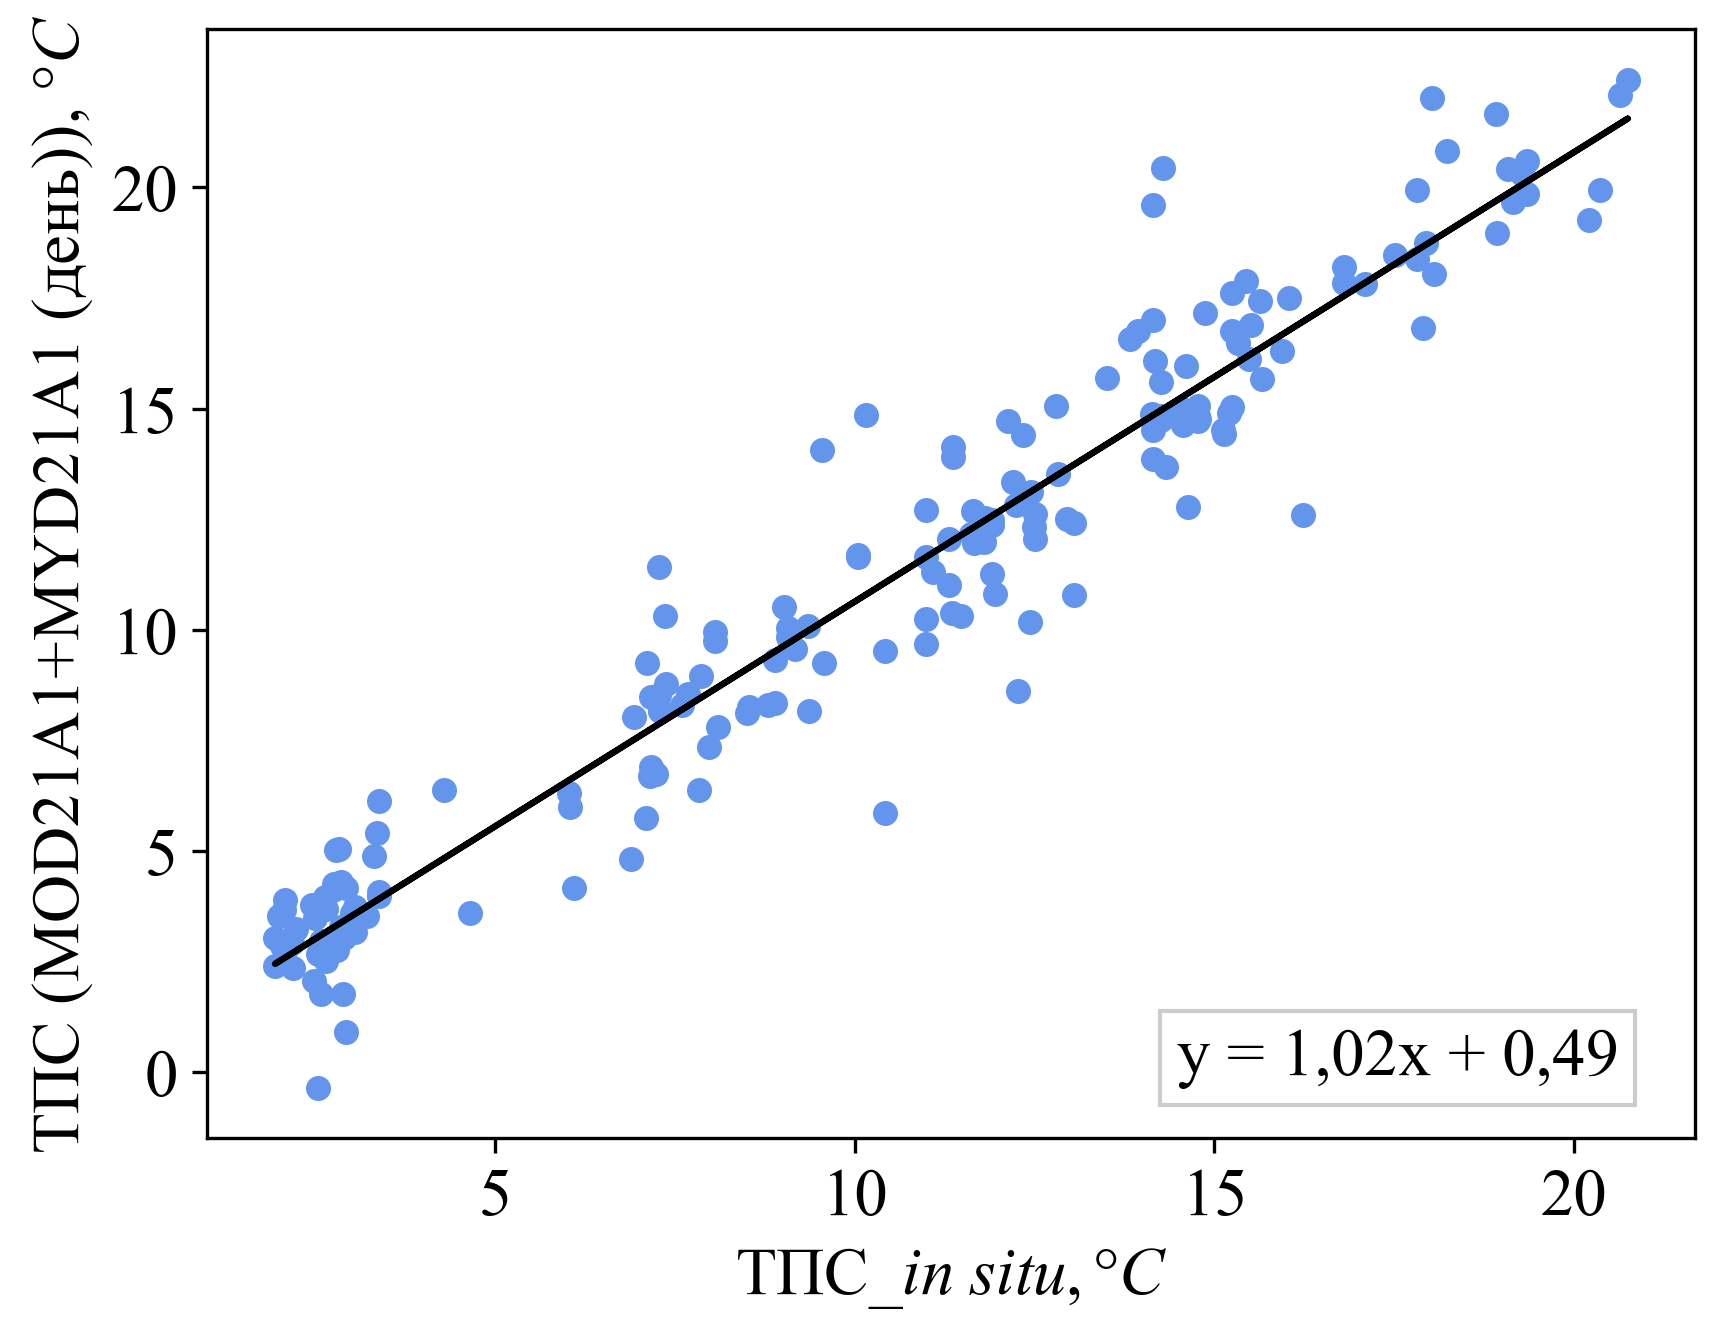

In [10]:
plot_validation(mod21_day_in_situ, mod21_day_image, r"ТПС (MOD21A1+MYD21A1 (день)), ${\degree}C$", "Линейная_регрессия/mod21_day_nor2.png", are_big_markers=True, show_r2=False)

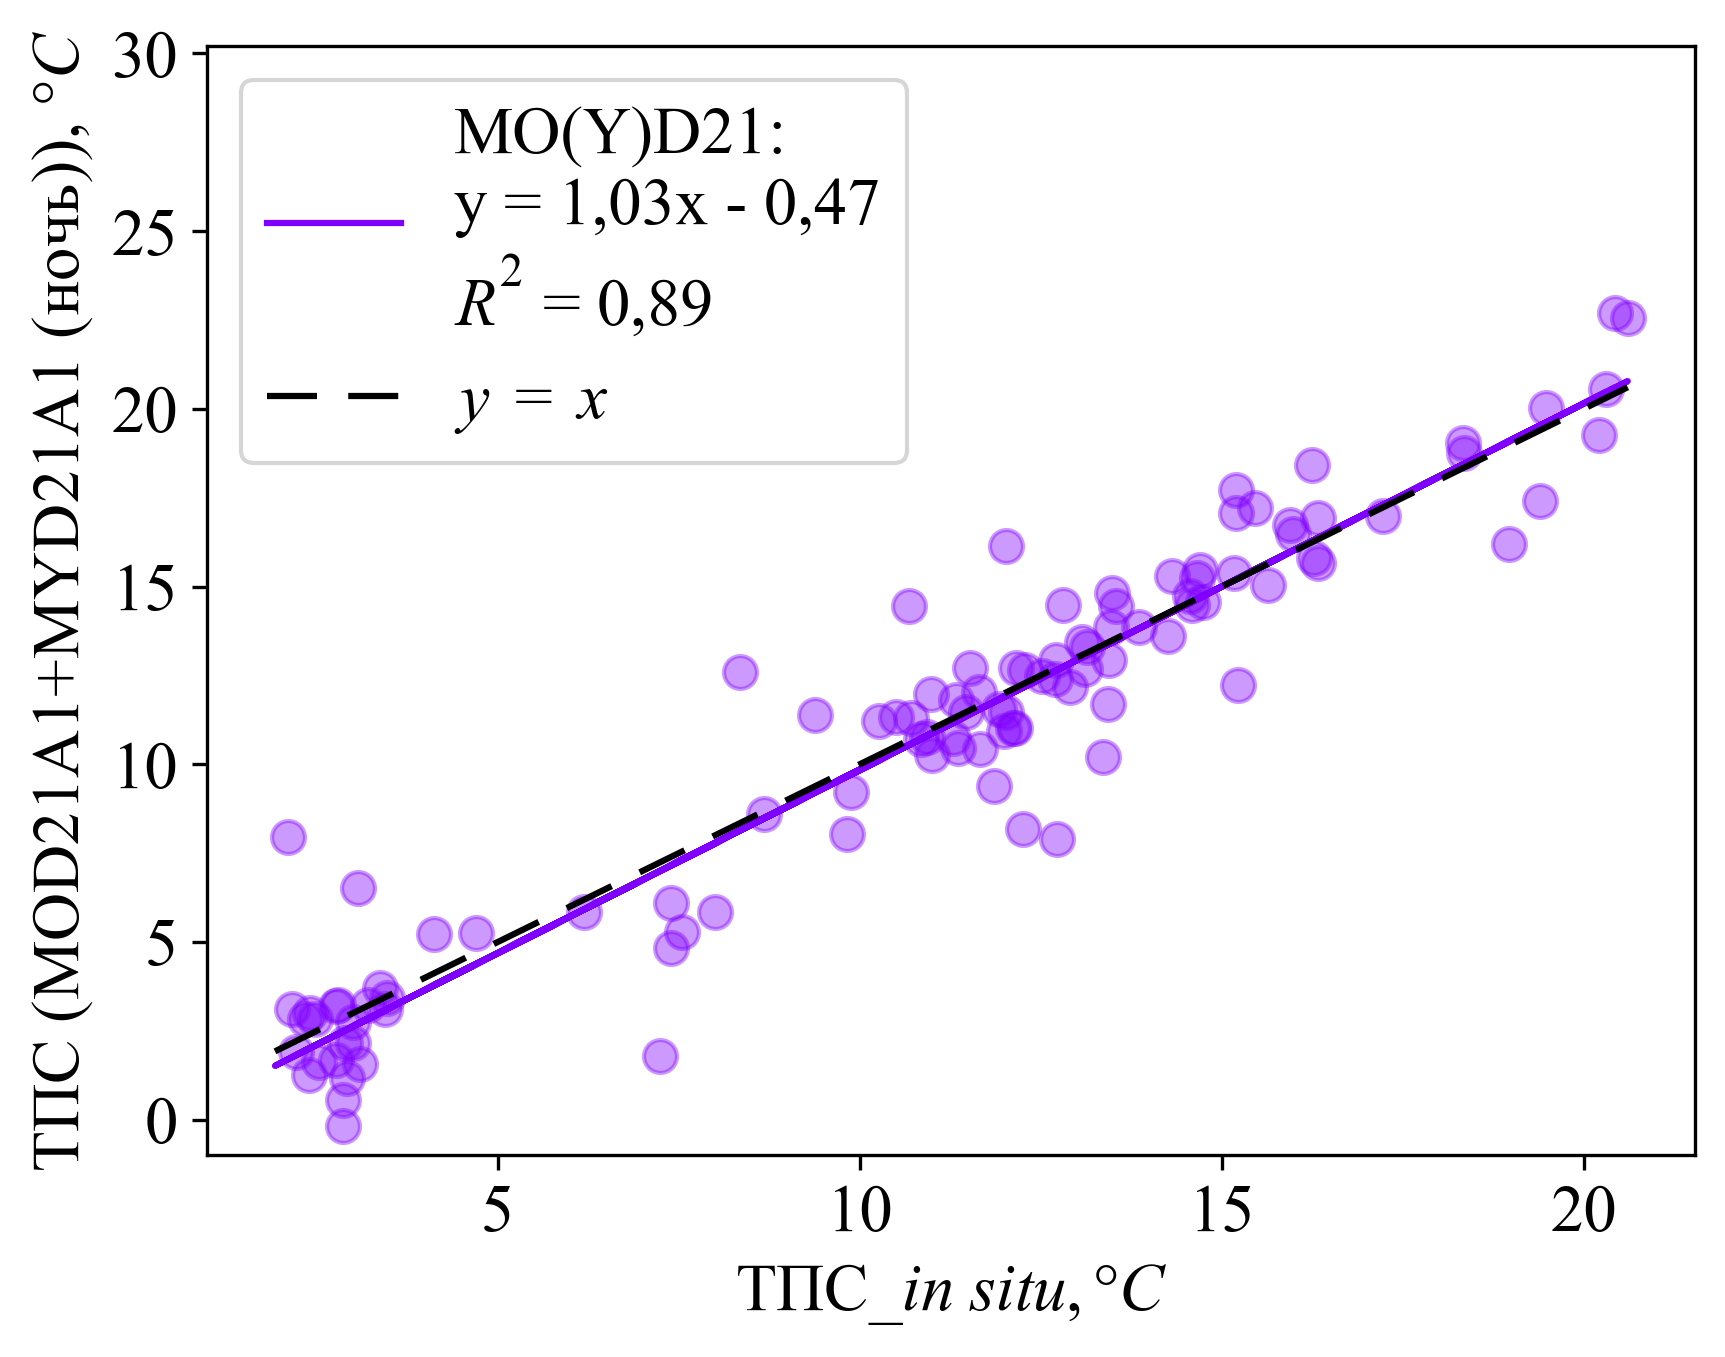

In [37]:
plot_validation_multiple([mod21_night_in_situ], [mod21_night_image], one_color, ["MO(Y)D21"], r"ТПС (MOD21A1+MYD21A1 (ночь)), ${\degree}C$", "Линейная_регрессия/mod21_night_color.png")

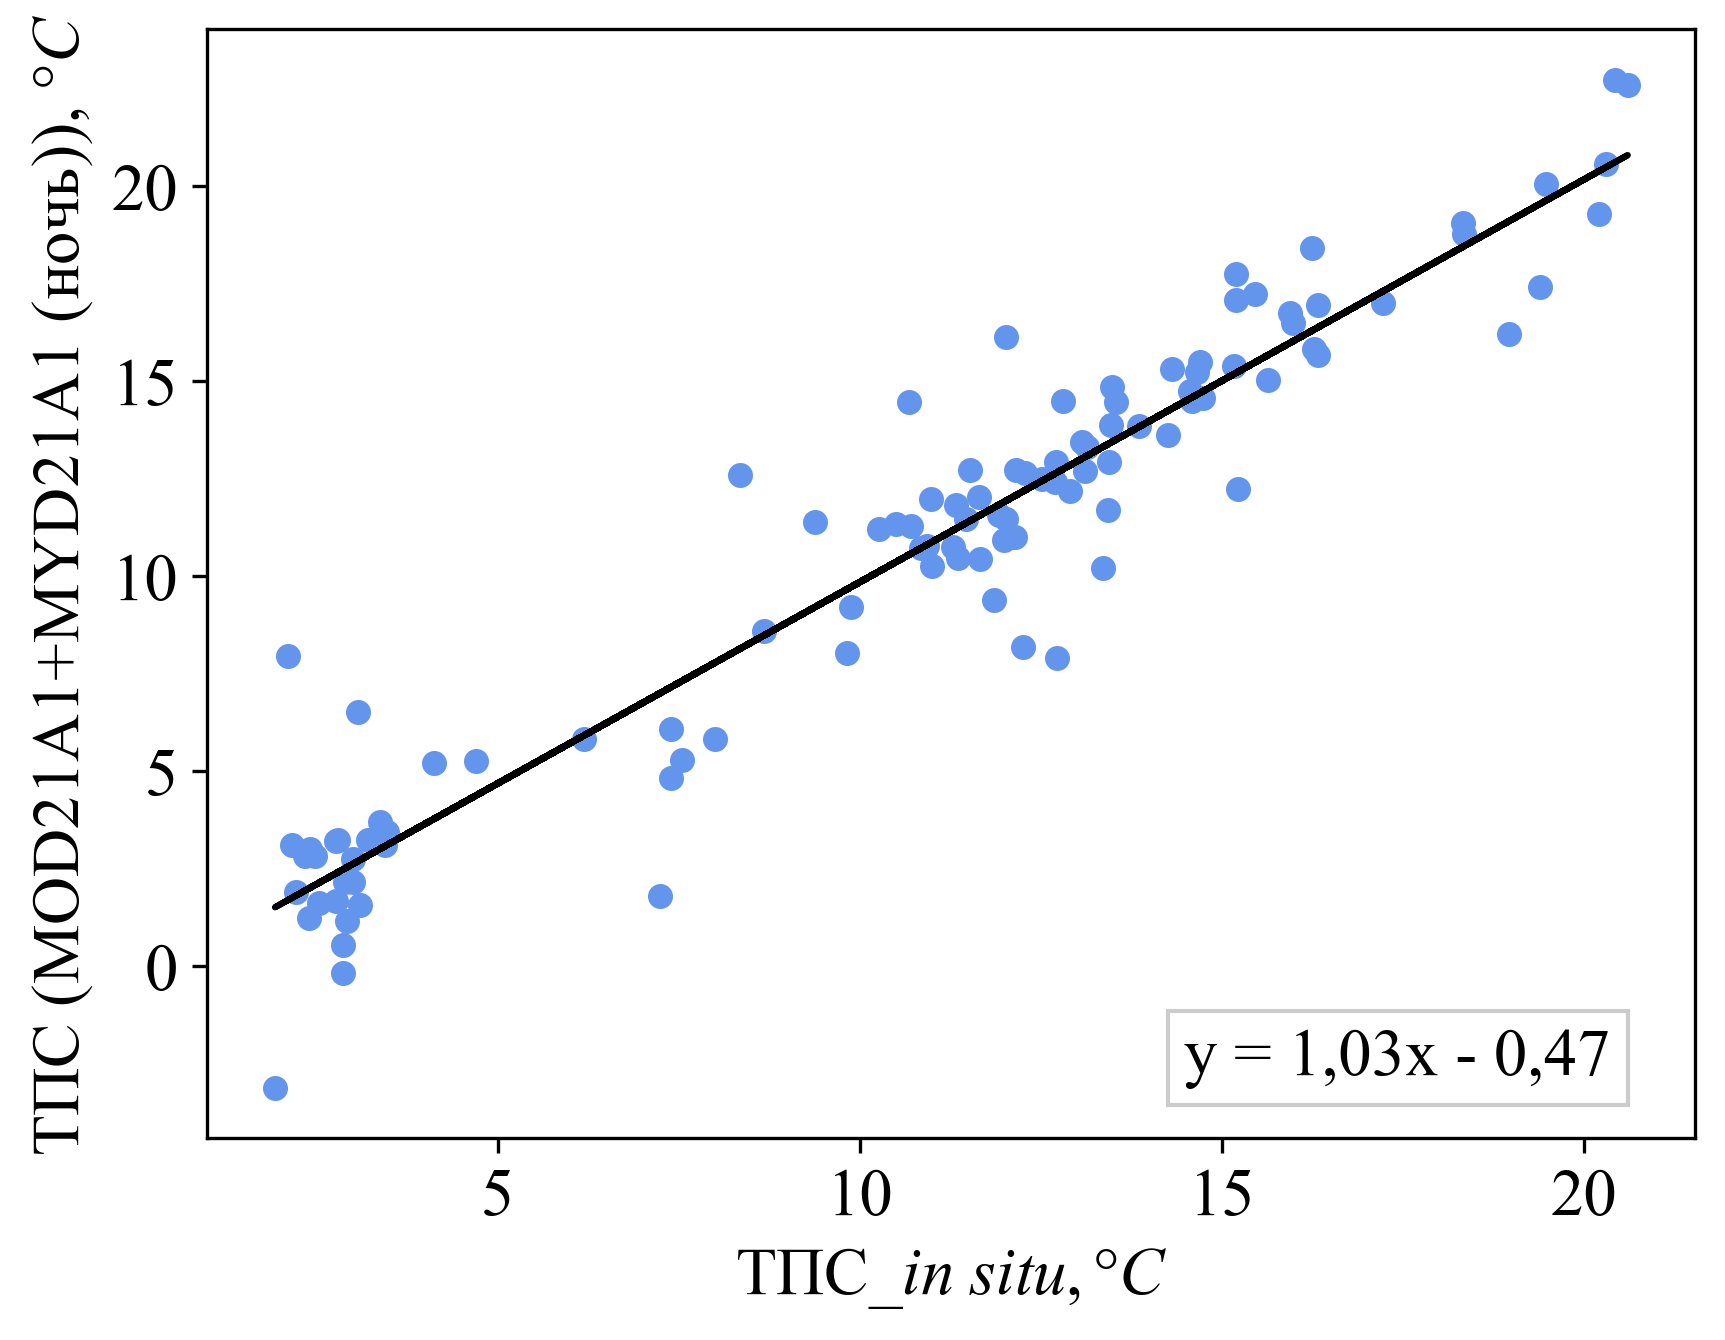

In [ ]:
plot_validation(mod21_night_in_situ, mod21_night_image, r"ТПС (MOD21A1+MYD21A1 (ночь)), ${\degree}C$", "Линейная_регрессия/mod21_night_nor2.png", are_big_markers=True, show_r2=False)

In [ ]:
print(mod21_day_image.min())

In [89]:
print(mod21_night_image[mod21_night_image>-3].min())
# 22.71000000000004
# -0.7099999999999795

-0.169999999999959


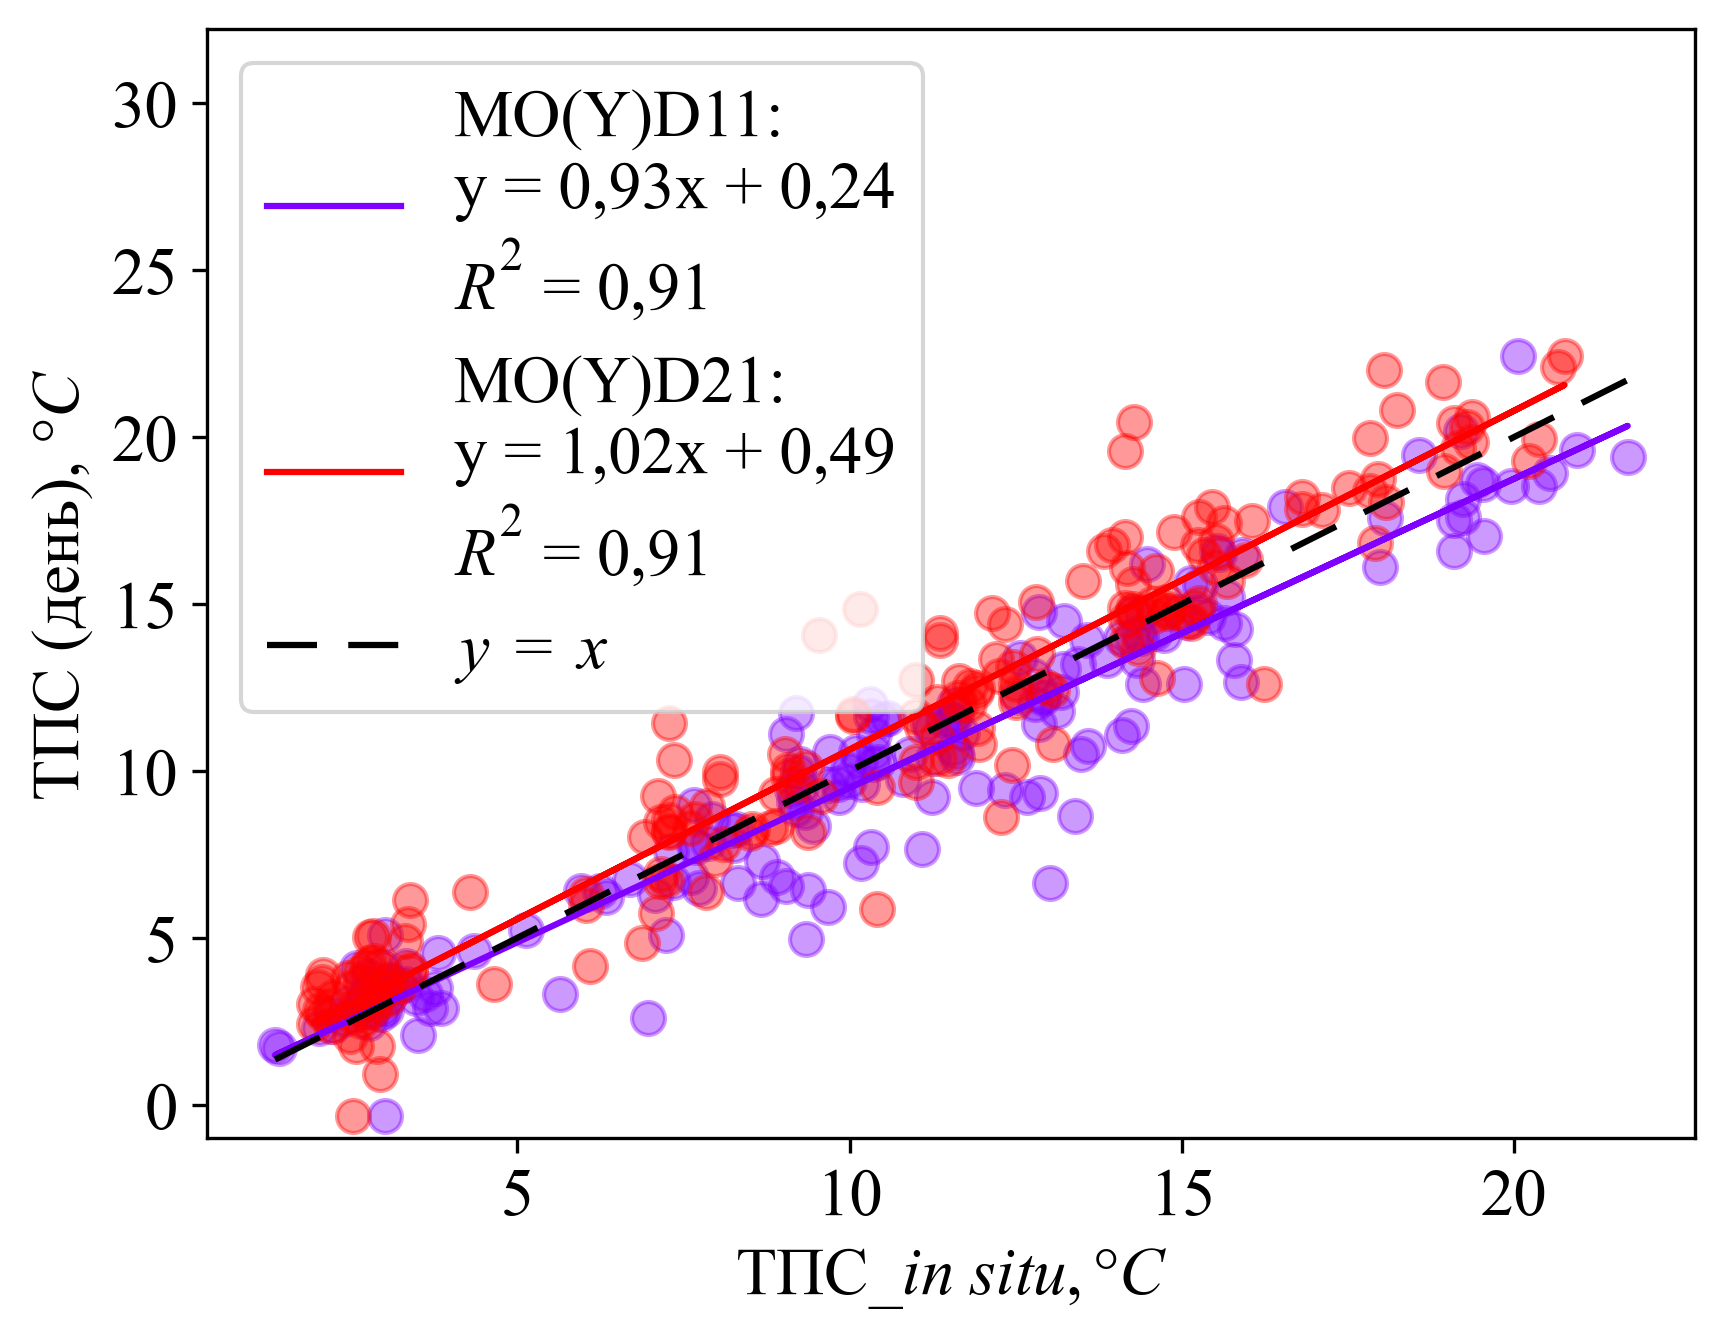

In [41]:
plot_validation_multiple([mod11_day_in_situ, mod21_day_in_situ], [mod11_day_image, mod21_day_image], two_colors, ["MO(Y)D11", "MO(Y)D21"], r"ТПС (день), ${\degree}C$", "Линейная_регрессия/modis_comparison_day_dashed.png")

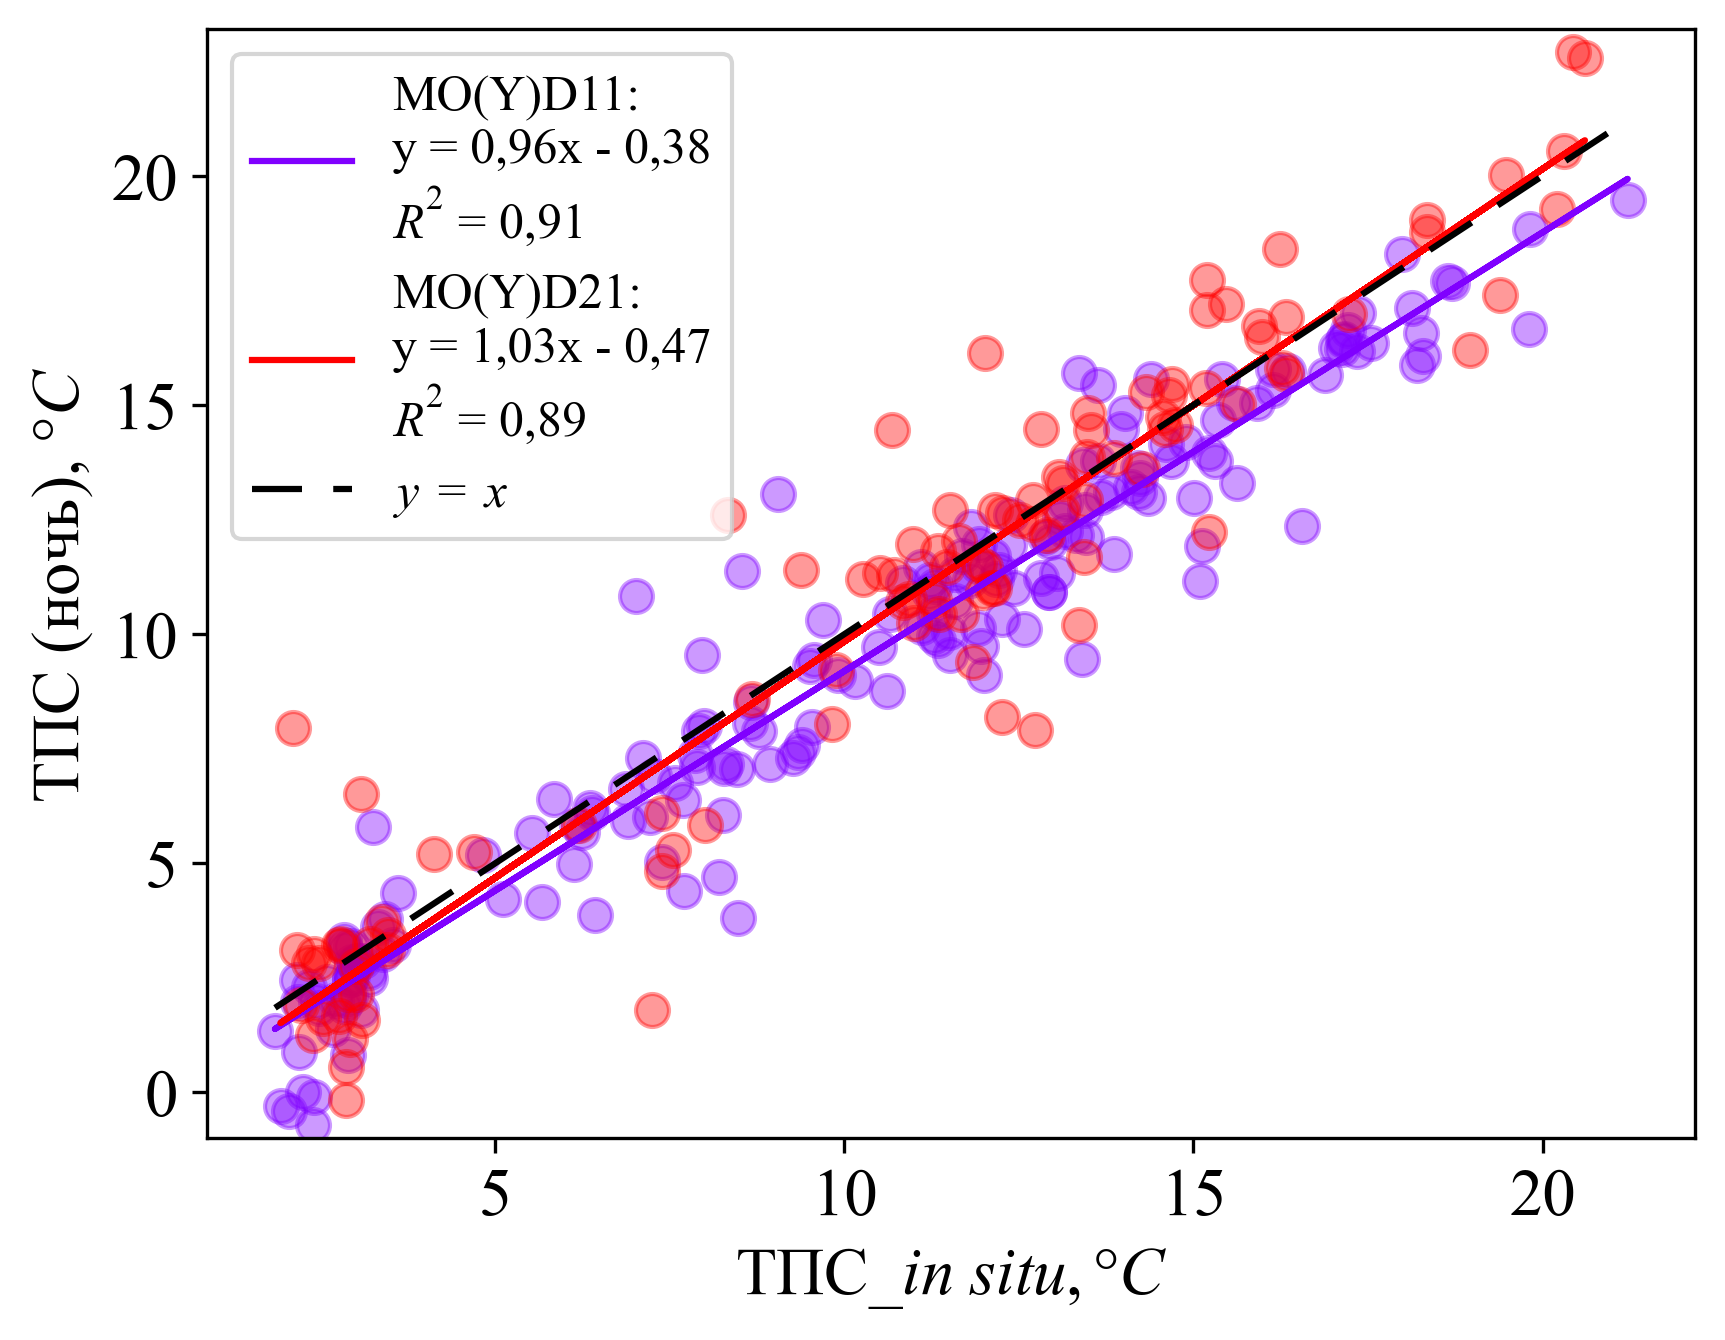

In [28]:
plot_validation_multiple([mod11_night_in_situ, mod21_night_in_situ], [mod11_night_image, mod21_night_image], two_colors, ["MO(Y)D11", "MO(Y)D21"], r"ТПС (ночь), ${\degree}C$","Линейная_регрессия/modis_comparison_night_dashed.png", legeng_font_size=12)